# Type 2 Diabetes - Risk Predictions

**Author: Damir Zunic**

# Introduction

<img style="float: right;" src="Figures/A1c_normal_to_high_ranges.png" width="165">
Type 2 diabetes is a chronic condition that affects the way the body metabolizes sugar (glucose). With type 2 diabetes, the body either resists the effects of insulin (a hormone that regulates the movement of sugar into cells) or it doesn't produce enough insulin to maintain normal glucose levels.

Type 2 diabetes occurs more commonly in middle-aged and elderly people. Uncontrolled it can cause all sorts of very bad things: infections, damaged kidneys, vision loss and blindness, amputations and many more. So, there is no question that type 2 diabetes needs to be taken seriously and treated. 

Type 2 diabetes is usually diagnosed using the **glycated hemoglobin (A1C)** test. This blood test indicates the average blood sugar level for the past two to three months. Normal levels are below 5.7 percent, and a result between 5.7 and 6.4 percent is considered prediabetes. An A1C level of 6.5 percent or higher on two separate tests means you have diabetes.

People who have diabetes need this test regularly to see if their levels are staying within range and if they need to adjust their diabetes medicines.

To treat type 2 diabetes lifestyle changes are very effective, and the side effects of eating more healthfully and staying more active are positive ones. 

In this project we will try to predict A1C levels: no-diabetes, pre-diabetes and diabetes. We will transform the dataset from a regression task (A1C) into a multi-class classification task (3 A1C levels).


### Diabetes Dataset

These data are courtesy of Dr John Schorling, Department of Medicine, University of Virginia School of Medicine.

The data consist of 19 variables on 403 subjects from 1046 subjects who were interviewed in a study to understand the prevalence of obesity, diabetes, and other cardiovascular risk factors in central Virginia for African Americans. According to Dr John Hong, Diabetes Mellitus Type II (adult onset diabetes) is associated most strongly with obesity. The waist/hip ratio may be a predictor in diabetes and heart disease. Type 2 Diabetes is also associated with hypertension - they may both be part of **Metabolic Syndrome**.

>**Metabolic syndrome** is a collection of risk factors that includes high blood pressure, high blood sugar, excess body fat around the waist, and abnormal cholesterol levels. The syndrome increases the chance of developing heart disease, stroke, and diabetes. Aside from a large waist circumference, most of the disorders associated with metabolic syndrome have no symptoms. Losing weight, exercise, and dietary changes can help prevent or reverse metabolic syndrome.
>
>According to a national health survey, more than 1 in 5 Americans has metabolic syndrome. The number of people with metabolic syndrome increases with age, affecting more than 40% of people in their 60s and 70s.

The 403 subjects were the ones who were actually screened for diabetes. Glycosolated hemoglobin (A1C) > 7.0 is usually taken as a positive diagnosis of diabetes. 

Data obtained from http://biostat.mc.vanderbilt.edu/DataSets.

#### Description of Features:

There are 403 observations and 19 features in this dataset, maximum # NaNs:262.

**Table 1.** List of Features


|Name|Description|Units|Classes|Storage|NAs|
|---|---|---|---|---|---|
|id|Subject ID|<i></i>|<i></i>|double|0|
|chol|Total Cholesterol|<i></i>|<i></i>|double|1|
|stab.glu|Stabilized Glucose|<i></i>|<i></i>|double|0|
|hdl|High Density Lipoprotein|<i></i>|<i></i>|double|1|
|ratio|Cholesterol/HDL Ratio|<i></i>|<i></i>|double|1|
|glyhb|Glycosolated Hemoglobin (A1C)|<i></i>|<i></i>|double|13|
|location|<i></i>|<i></i>|2 (Table 2)|integer|0|
|age|<i></i>|years|<i></i>|double|0|
|gender|<i></i>|<i></i>|2 (Table 2)|integer|0|
|height|<i></i>|inches|<i></i>|double|5|
|weight|<i></i>|pounds|<i></i>|double|1|
|frame|<i></i>|<i></i>|3 Table 2)|integer|12|
|bp.1s|First Systolic Blood Pressure|<i></i>|<i></i>|ouble|5|
|bp.1d|First Diastolic Blood Pressure|<i></i>|<i></i>|double|5|
|bp.2s|Second Systolic Blood Pressure|<i></i>|<i></i>|double|262|
|bp.2d|Second Diastolic Blood Pressure|<i></i>|<i></i>|double|262|
|waist|<i></i>|inches|<i></i>|double|2|
|hip|<i></i>|inches|<i></i>|double|2|
|time.ppn|Postprandial Time when Labs were Drawn|minutes|<i></i>|double|3|



**Table 2.** Classes of Categorical Features

|Feature|Classes|
|---|---|
|location|Buckingham|
|<i></i>|Louisa|
|gender|male|
|<i></i>|female|
|frame|small|
|<i></i>|medium|
|<i></i>|large|


### Challenges

We were facing two challenges with our dataset:

* relatively small number of observations 

* imbalanced classes (A1C levels)

To overcome the issues with imbalanced data, we will use several techniques:

1. f1 macro averaged score for performance metric

2. cost-sensitive learning (penalize algorithms)

3. SMOTE - Synthetic Minority Over-sampling Technique

and several machine learning algorithms:

1. $L_1$-regularized Logistic Regression

2. $L_2$-regularized Logistic Regression

3. Support Vector Machine (SVM)

4. Random Forest

5. Gradient Boosting

6. AdaBoost

All together, we have trained 22 models.


### Findings

From our limited sample we could not find any single condition that would alone increase the risk for type 2 diabetes.

We found that several factors could impact risks for the person to be diagnosed with diabetes: age, high cholesterol ratio, high blood pressure, increased weight... 

Even if you have all these conditions it does not mean you will have type 2 diabetes. This will make very difficult for our models to predict A1C levels.

Due to imbalanced data, all models had problems with predicting minority classes: <code>pre_diabetes</code> and <code>diabetes</code>. They were mostly predicting the majority class, <code>no_diabetes</code>.

At the end, we found that Random Forest algorithm with cost_sensitive learning did the best with f1 macro score of 0.56.

### Motivation

As I was diagnosed with pre-diabetes several years ago, the subject of this project has close connection and importance to me.

With a change in my lifestyle only, with no medication, I was able to decrease A1C to normal values.

I have expected that this project would produce a confirmation of my experience especially in regard to impact of BMI. But the results showed us that type 2 diabetes is very personal condition.

People with similar health risks could have different chances of developing type 2 diabetes.

## Library Imports

In [1]:
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Numpy for numerical computing
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# display Python object in all frontends
from IPython.display import display

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

In [2]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import SVM classifier 
from sklearn.svm import SVC 

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split, StratifiedKFold

# Function for creating model pipelines - sklearn
from sklearn.pipeline import make_pipeline

# Function for creating model pipelines - imblearn
from imblearn.pipeline import make_pipeline as imbl_pipe

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

# set class weights for imbalaced datasets
from sklearn.utils.class_weight import compute_class_weight

# Ignore some warning messages
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning, UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)

## Exploratory Analysis

**Importing the dataset**

In [3]:
# Load the dataset
df = pd.read_csv('Data/diabetes.csv')
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


**Renaming Feature Names**

Before we continue with EDA we will rename several features by replacing dots in the names with underscores to allow us using the "dot notation":

* stab.glu &rarr; stab_glu

* bp.1s &rarr; bp_1s

* bp.1d &rarr; bp_1d

* bp.2s &rarr; bp_2s

* bp.2d &rarr; bp_2d

* time.ppn &rarr; time_ppn


At the same time we will rename the target variable:

* glyhb &rarr; a1c

The *ratio* feature is the cholesterol ratio: $chol \div hdl$. Lower the ratio the better. Let's rename this feature as well:

* ratio &rarr; chol_ratio

In [4]:
# Rename feature names
df.rename(columns={'glyhb':'a1c', 'stab.glu':'stab_glu', 'ratio':'chol_ratio','bp.1s':'bp_1s', 'bp.1d':'bp_1d',
                   'bp.2s':'bp_2s', 'bp.2d':'bp_2d', 'time.ppn':'time_ppn'}, inplace=True)
df.head()

,id,chol,stab_glu,hdl,chol_ratio,a1c,location,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip,time_ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [5]:
# List names of the columns
df.columns

Index(['id', 'chol', 'stab_glu', 'hdl', 'chol_ratio', 'a1c', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp_1s', 'bp_1d', 'bp_2s',
       'bp_2d', 'waist', 'hip', 'time_ppn'],
      dtype='object')

In [6]:
# Dataframe dimensions
df.shape

(403, 19)

In [7]:
# Column datatypes
df.dtypes

id              int64
chol          float64
stab_glu        int64
hdl           float64
chol_ratio    float64
a1c           float64
location       object
age             int64
gender         object
height        float64
weight        float64
frame          object
bp_1s         float64
bp_1d         float64
bp_2s         float64
bp_2d         float64
waist         float64
hip           float64
time_ppn      float64
dtype: object

* The feature names are now looking good.

* As we expected, there are 403 observations and 19 features in the data set.

* There are 16 numerical features and 3 categorical features. All data types are correct



**Unused Features**

To make dataframe easily readable we will remove unused features like <code style="color:steelblue">id</code> and <code style="color:steelblue">location</code>.

The goal of this project is to predict ranges of A1C. From a quick look through our dataframe we could see that the postprandial time when labs were drawn varies. So, let's check its distribution.

Min. Postprandial Time: 0.08 hours ( 5.0 minutes)
Max. Postprandial Time: 26.0 hours ( 1560.0 minutes)


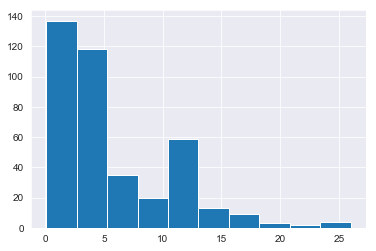

In [8]:
# Postprandial time in hours
df_ppn_h = df['time_ppn'] / 60

# Display min and max postprandial times
print('Min. Postprandial Time:', round(df_ppn_h.min(),2), 'hours', '(', df.time_ppn.min(), 'minutes)')
print('Max. Postprandial Time:', round(df_ppn_h.max(),2), 'hours', '(', df.time_ppn.max(), 'minutes)')

# Histogram for time_ppn in hours
(df['time_ppn'] / 60).hist()
plt.show()

Since the postprandial time when labs were drawn has very wide range, from 5 minutes to 26 hours, we could remove <code style="color:steelblue">stab_glu</code> and <code style="color:steelblue">time_ppn</code> features.

In [9]:
# Drop unused features
df.drop(['id', 'stab_glu', 'location', 'time_ppn'], axis=1, inplace=True)
df.head()

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0
2,228.0,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0
3,78.0,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0
4,249.0,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0


In [10]:
# Dataframe dimensions
df.shape

(403, 15)

The number of features has been decreased to 15.

### Distributions of Numeric Features

**Plotting the histogram grid**

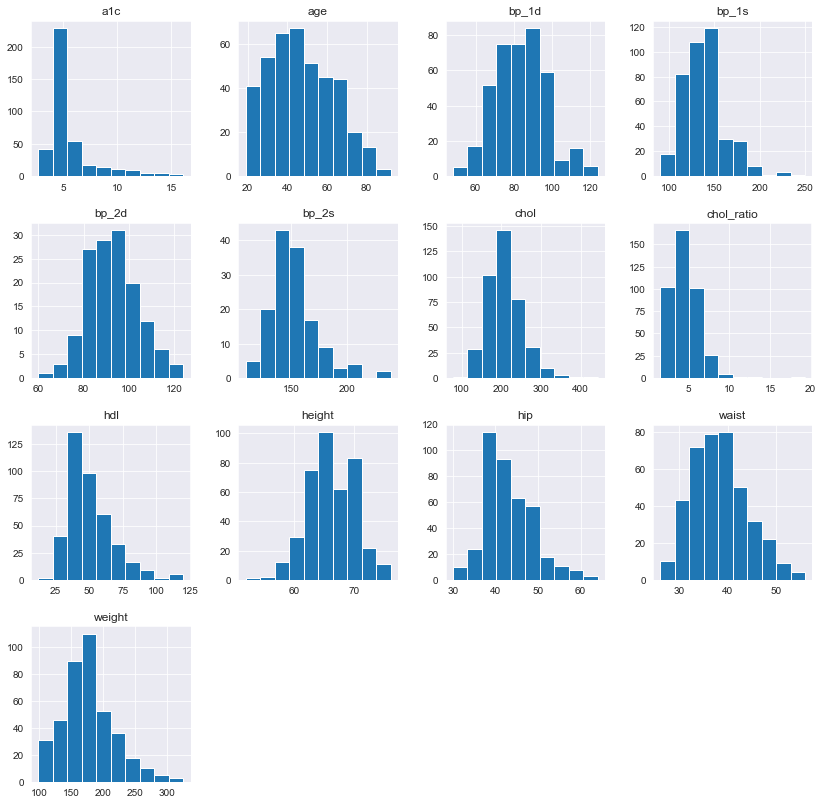

In [11]:
# Plot histogram grid
df.hist(figsize=(14,14))

plt.show()

All distributions look OK. Only for <code style="color:steelblue">a1c</code> we could see many observations around 5% (healthy range). This might be an indication of imbalanced data classes once we transfer <code style="color:steelblue">a1c</code> to 3 classes.

**Summary statistics for the numeric features**

In [12]:
# Summarize numerical features
df.describe()

,chol,hdl,chol_ratio,a1c,age,height,weight,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
count,402.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000
mean,207.845771,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900
std,44.445557,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713
min,78.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000
25%,179.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000
50%,204.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000
75%,230.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000
max,443.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000


From the summary statistics and the visualizations we can conclude that all features look OK. We do not see any extreme values for any feature.

### Distributions of Categorical Features

In [13]:
# Summarize categorical features
df.describe(include=['object'])

,gender,frame
count,403,391
unique,2,3
top,female,medium
freq,234,184


This shows us the number of unique classes for each feature. For example, there are more females (234) than males. And `'medium'` is most common body frame. There are no sparse classes.

Let's visualize this information, using Seaborn <code>.countplot()</code> function.

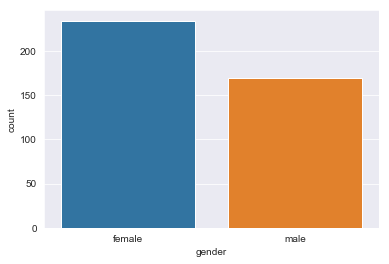

Counter({'female': 234, 'male': 169})

In [14]:
# Bar plot for 'gender'
sns.countplot(x='gender', data=df)
plt.show()

# Display count of each class
Counter(df.gender)

No missing data for the <code style="color:steelblue">gender</code> feature and our sample has more females.

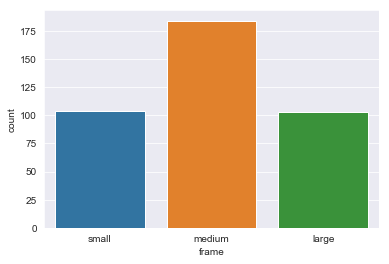

Counter({'medium': 184, 'large': 103, 'small': 104, nan: 12})

In [15]:
# Bar plot for 'frame'
sns.countplot(x='frame', data=df, order=['small', 'medium', 'large'])
plt.show()

# Display count of each class
Counter(df.frame)

Medium body frame is most common and almost the same number of participants belongs to the small and large body frame classes. We can also see that there are 12 missing values.

### Segmentations

Later on we will encode <code style="color:steelblue">a1c</code> to 3 classes and this will become our target variable. But, for the moment we can treat <code style="color:steelblue">a1c</code> as the target.

First we will segment <code style="color:steelblue">a1c</code> by <code>gender</code>.

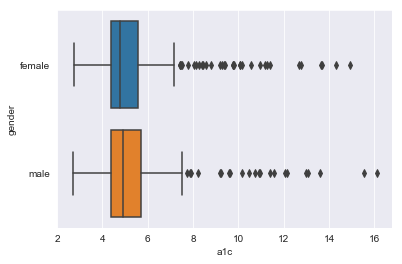

In [16]:
# Segment a1c by gender and plot distributions
sns.boxplot(y='gender', x='a1c', data=df)
plt.show()

In [17]:
# Segment a1c by gender and display the means within each class
df.groupby('gender').mean()

,chol,hdl,chol_ratio,a1c,age,height,weight,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
gender,,,,,,,,,,,,,
female,208.435897,52.111111,4.355983,5.494342,45.833333,63.733624,174.487179,136.307359,82.484848,153.350649,91.753247,38.124464,44.347639
male,207.023810,48.125000,4.752381,5.724074,48.260355,69.118343,181.916667,137.730539,84.479042,151.218750,93.453125,37.589286,41.226190


It is not easy to see from the plot, but grouping by gender can show us that average <code style="color:steelblue">a1c</code> for females is slightly lower tthan for males.

Next, let's segment <code style="color:steelblue">a1c</code> by body frame.

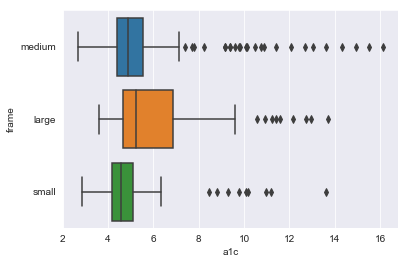

In [18]:
# Segment a1c by frame and plot distributions
sns.boxplot(y='frame', x='a1c', data=df)
plt.show()

In [19]:
# Segment by frame and display the means within each class
df.groupby('frame').mean()

,chol,hdl,chol_ratio,a1c,age,height,weight,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
frame,,,,,,,,,,,,,
large,208.000000,44.601942,4.992233,6.105657,52.844660,66.643564,203.805825,141.184466,83.398058,154.513514,93.648649,41.823529,45.735294
medium,213.538043,50.798913,4.638043,5.640281,45.706522,65.701087,178.311475,137.762431,84.950276,151.506667,91.680000,37.890710,43.360656
small,197.495146,55.543689,3.845631,5.040882,42.211538,66.088235,150.961538,130.029126,79.980583,153.318182,93.681818,34.048077,39.778846


This time we can see from the plot and from grouping that average <code style="color:steelblue">a1c</code> increases with body frame size.

We will keep all outliers. They just represent high and, for some observations, extreme values of <code style="color:steelblue">a1c</code>.

### Correlations

Let's calculate correlations to take a look at the relationships between numeric features and other numeric features.

We are going to sort features in order of their correlation with <code style="color:steelblue">a1c</code>. This will make easier to see stronger correlations for <code style="color:steelblue">a1c</code>.

In [20]:
# Calculate correlations between numeric features
correlations = df.corr()

# sort features in order of their correlation with a1c
sort_corr_cols = correlations.a1c.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,a1c,age,chol_ratio,chol,waist,bp_1s,weight,hip,height,bp_2s,bp_1d,hdl,bp_2d
a1c,1.000000,0.338929,0.328665,0.247099,0.226184,0.197936,0.171882,0.141401,0.063023,0.042671,0.032375,-0.149145,-0.160241
age,0.338929,1.000000,0.148510,0.233119,0.149645,0.443041,-0.055970,0.008819,-0.090493,0.366340,0.058227,0.038088,-0.134088
chol_ratio,0.328665,0.148510,1.000000,0.475521,0.304162,0.119386,0.281649,0.194622,0.094335,-0.048257,0.048193,-0.686907,-0.155987
chol,0.247099,0.233119,0.475521,1.000000,0.124489,0.203344,0.066889,0.079402,-0.058858,0.080418,0.171605,0.186581,0.003482
waist,0.226184,0.149645,0.304162,0.124489,1.000000,0.196489,0.849855,0.837080,0.051094,0.093171,0.167110,-0.268369,0.048802
bp_1s,0.197936,0.443041,0.119386,0.203344,0.196489,1.000000,0.090873,0.136655,-0.047827,0.868773,0.596557,0.019804,0.291365
weight,0.171882,-0.055970,0.281649,0.066889,0.849855,0.090873,1.000000,0.829115,0.251251,-0.071383,0.175956,-0.290983,0.041657
hip,0.141401,0.008819,0.194622,0.079402,0.837080,0.136655,0.829115,1.000000,-0.107832,0.013381,0.145805,-0.210060,0.045458
height,0.063023,-0.090493,0.094335,-0.058858,0.051094,-0.047827,0.251251,-0.107832,1.000000,-0.060529,0.038598,-0.101419,0.077816
bp_2s,0.042671,0.366340,-0.048257,0.080418,0.093171,0.868773,-0.071383,0.013381,-0.060529,1.000000,0.305244,0.128762,0.420709


It is not easy to digest this big dataframe.

Let's use Seaborn's <code>.heatmap()</code> function to visualize the correlation grid.

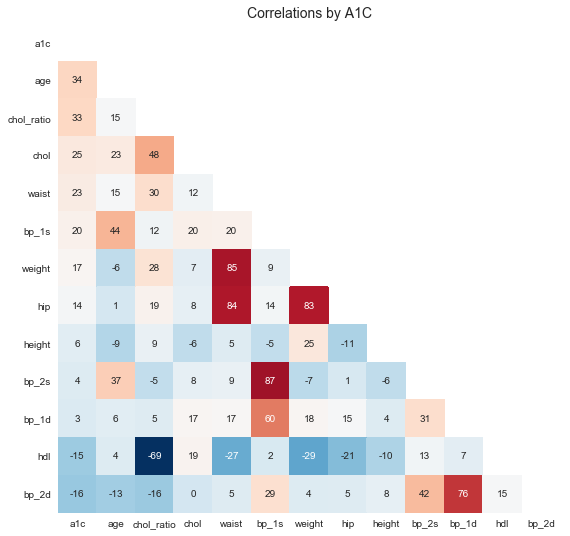

In [21]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

# Plot heatmap of annotated correlations; change background to white
with sns.axes_style('white'):
    sns.heatmap(sort_corr*100, 
                cmap='RdBu_r', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)
    
plt.title('Correlations by A1C', fontsize=14)
plt.yticks(rotation=0)
plt.show()

We can see few obvious stronger correlations:

* <code style="color:steelblue">weight</code> and <code style="color:steelblue">waist</code> and <code style="color:steelblue">hip</code>

* blood presure measurements

* cholesterol ratio and <code style="color:steelblue">chol</code> and <code style="color:steelblue">hdl</code>

But there are only few week correlations with <code style="color:steelblue">a1c</code>:

* <code style="color:steelblue">chol_ratio</code>, <code style="color:steelblue">age</code>, <code style="color:steelblue">waist</code> ...

## Data Cleaning

### Duplicate observations

In [22]:
print('Before:', df.shape)
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

Before: (403, 15)
(403, 15)


There were no duplicates in the dataframe.

### Missing Data

In [23]:
# Display number of missing values by feature
df.isnull().sum()

chol            1
hdl             1
chol_ratio      1
a1c            13
age             0
gender          0
height          5
weight          1
frame          12
bp_1s           5
bp_1d           5
bp_2s         262
bp_2d         262
waist           2
hip             2
dtype: int64

* Only <code style="color:steelblue">gender</code> and <code style="color:steelblue">age</code> 
features do not have any missing values. 

* The second blood presure observations have plenty of missing values.

First, let's take care of the target variable.

**Handling missing values for the target value**

Our target variable will be constructed later from the values in the <code style="color:steelblue">a1c</code> feature.

We can see that there are 13 missing values for <code style="color:steelblue">a1c</code>, so let's remove those observations.

In [24]:
# df.drop(df[df['a1c'].isnull()].index, inplace=True)
df.dropna(subset=['a1c'], inplace=True)
print(df.shape)

(390, 15)


In [25]:
df.isnull().sum()

chol            1
hdl             1
chol_ratio      1
a1c             0
age             0
gender          0
height          5
weight          1
frame          11
bp_1s           5
bp_1d           5
bp_2s         252
bp_2d         252
waist           2
hip             2
dtype: int64

The number of observations has ben decrased to 390.

Next, we are going to check categorical features for missinig data.

**Find and count the missing *categorical* data**

In [26]:
# Count the number of missing values for categorical features
df.select_dtypes(include=['object']).isnull().sum()

gender     0
frame     11
dtype: int64

The <code style="color:steelblue">frame</code> feature has 11 missing values. Let's take care of this.

**Label missing categorical values as 'Missing'**

We will handle this by simply labeling missing values as 'Missing'.

In [27]:
# fill missing values in frame with 'Missing
df['frame'].fillna('Missing', inplace=True)

We can confirm now that the <code style="color:steelblue">frame</code> feature does not have any missing values:

In [28]:
# Count the number of missing values for categorical features
df.select_dtypes(include=['object']).isnull().sum()

gender    0
frame     0
dtype: int64

The new class <code>'Missing'</code> has been added to the <code style="color:steelblue">frame</code> feature:

In [29]:
# Display the count for each class
df.frame.value_counts()

medium     178
small      102
large       99
Missing     11
Name: frame, dtype: int64

**Find and count the missing *numerical* data**

Next, we will continue with missing values for numerical features.

In [30]:
# Count the number of missing values for numerical features
df.select_dtypes(exclude=['object']).isnull().sum()

chol            1
hdl             1
chol_ratio      1
a1c             0
age             0
height          5
weight          1
bp_1s           5
bp_1d           5
bp_2s         252
bp_2d         252
waist           2
hip             2
dtype: int64

First we will take care of four blood preasure features.

***<u>Blood Presure Measurements</u>***

Let's check observations for missing data of the first blood preasure measurments.

There should be 5 observations and we want to check the status of the second blood preasure measuremnets in them.

In [31]:
# Display observations with bp_1s missing
df[df.bp_1s.isnull()]

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip
7,227.0,44.0,5.2,3.94,37,male,59.0,170.0,medium,NaN,NaN,NaN,NaN,34.0,39.0
13,183.0,46.0,4.0,4.59,40,female,59.0,165.0,medium,NaN,NaN,NaN,NaN,37.0,43.0
37,190.0,32.0,5.9,3.56,46,male,72.0,205.0,medium,NaN,NaN,NaN,NaN,46.0,49.0
63,145.0,29.0,5.0,3.99,38,female,NaN,125.0,Missing,NaN,NaN,NaN,NaN,31.0,35.0
215,197.0,46.0,4.3,4.75,36,female,64.0,136.0,small,NaN,NaN,NaN,NaN,32.0,37.0


There are 252 missing data for the second blood presure measurement and 5 for the first measurement. We will create a new features,<code style="color:steelblue"> bp_s</code> and <code style="color:steelblue">bp_d</code>, and at the end this will handle missing data. 

* *bp_1s* & *bp_2s* &rarr; **bp_s**

* *bp_1d* & *bp_2d* &rarr; **bp_d**

The new features are average of two measurements for both, systolic and diastolic, blood presures respectively. The mean will take care of most of the `NaN`s, except for the observations listed above. 

Because all blood preasure measurements are missing, the newly constracted features will still have missing values for those 5 observations.

In [32]:
# Create 2 new features, bp_s and bp_d
df['bp_s'] = df[['bp_1s', 'bp_2s']].mean(axis=1)
df['bp_d'] = df[['bp_1d', 'bp_2d']].mean(axis=1)

df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,bp_1s,bp_1d,bp_2s,bp_2d,waist,hip,bp_s,bp_d
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,118.0,59.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,112.0,68.0


Now we can drop the old features:

In [33]:
# Drop the old features: bp_1s, bp_2s, bp_1d, bp_2d 
df.drop(['bp_1s', 'bp_2s', 'bp_1d', 'bp_2d'], axis=1, inplace=True)
df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,29.0,38.0,118.0,59.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,46.0,48.0,112.0,68.0


In [34]:
# Display observations with bp_s missing
df[df.bp_s.isnull()]

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
7,227.0,44.0,5.2,3.94,37,male,59.0,170.0,medium,34.0,39.0,NaN,NaN
13,183.0,46.0,4.0,4.59,40,female,59.0,165.0,medium,37.0,43.0,NaN,NaN
37,190.0,32.0,5.9,3.56,46,male,72.0,205.0,medium,46.0,49.0,NaN,NaN
63,145.0,29.0,5.0,3.99,38,female,NaN,125.0,Missing,31.0,35.0,NaN,NaN
215,197.0,46.0,4.3,4.75,36,female,64.0,136.0,small,32.0,37.0,NaN,NaN


We just confirmed what we predicted earlier: 5 observations have still missing blood preasure values.

We will take care of them with the rest of missing data which we are going to display and count right now:

***<u>Cholesterol Measurements</u>***

In [35]:
# Display and count observations with cholesetrol values missing
display(df.loc[df[['chol', 'hdl', 'chol_ratio']].isnull().any(axis=1)])
print(df[['chol', 'hdl', 'chol_ratio']].isnull().sum())

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
27,NaN,NaN,NaN,4.28,48,male,68.0,100.0,small,27.0,33.0,120.0,85.0


chol          1
hdl           1
chol_ratio    1
dtype: int64


***<u>Waist and Hip Measurements</u>***

In [36]:
# Display and count observations with waist and hip values missing
display(df[df[['waist', 'hip']].isnull().any(axis=1)])
print(df[['waist', 'hip']].isnull().sum())

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
336,158.0,64.0,2.5,2.73,30,female,62.0,142.0,medium,NaN,NaN,108.0,68.0
393,192.0,69.0,2.8,4.38,51,male,65.0,146.0,large,NaN,NaN,150.0,114.0


waist    2
hip      2
dtype: int64


***<u>Height and Weight Measurements</u>***

In [37]:
# Display and count observations with height or weight missing
display(df[df.height.isnull() | df.weight.isnull()])
print(df[['weight', 'height']].isnull().sum())

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
63,145.0,29.0,5.0,3.99,38,female,NaN,125.0,Missing,31.0,35.0,NaN,NaN
86,218.0,54.0,4.0,10.55,51,female,NaN,215.0,large,42.0,53.0,139.0,69.0
161,115.0,36.0,3.2,13.60,58,male,69.0,NaN,medium,30.0,37.0,125.0,69.0
195,173.0,37.0,4.7,4.31,40,female,NaN,130.0,small,37.0,38.0,122.0,76.0
231,214.0,35.0,6.1,5.38,44,female,NaN,190.0,large,38.0,44.0,140.0,75.0
317,300.0,59.0,5.1,4.56,34,female,NaN,160.0,small,40.0,47.0,120.0,60.0


weight    1
height    5
dtype: int64


***<u>Calculate number of observations with missing values</u>***

In [38]:
# Count the number of missing values for numerical features
print(df.select_dtypes(exclude=['object']).isnull().sum(), '\n')

# Count the total number of missing values 
print('Total number of missing values (NaNs):',
      df.select_dtypes(exclude=['object']).isnull().sum().sum(),'\n')

# Number of observations with at least one NaN
row_nan = df.loc[df.isnull().any(axis=1)].shape[0]
print('Observations with at least 1 Nan:', row_nan)

chol          1
hdl           1
chol_ratio    1
a1c           0
age           0
height        5
weight        1
waist         2
hip           2
bp_s          5
bp_d          5
dtype: int64 

Total number of missing values (NaNs): 23 

Observations with at least 1 Nan: 13


In [39]:
# Current shape of dataframe
df.shape

(390, 13)

The 23 missing values are spread across 9 of 11 numerical features and 13 observations. The proportion of impacted observations is small relative to the entire dataset.

This is why we are going to drop those 13 observations.

In [40]:
# Drop all observations with missing values
df.dropna(inplace=True)

print(df.shape)

(377, 13)


Confirm that there are no missing values.

In [41]:
# Count missing values
df.isnull().sum()

chol          0
hdl           0
chol_ratio    0
a1c           0
age           0
gender        0
height        0
weight        0
frame         0
waist         0
hip           0
bp_s          0
bp_d          0
dtype: int64

Yes, our dataset does not have any missing values. 

The number of observations is now 377. 

#### Index reset

After we finished with removing observations, we should reset the index.

In [42]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
            ...
            390, 391, 392, 394, 395, 397, 398, 399, 400, 401],
           dtype='int64', length=377)

In [43]:
# index reset
df.reset_index(drop=True, inplace=True)

In [44]:
df.index

RangeIndex(start=0, stop=377, step=1)

## Feature Engineering

Let's display the first 5 observations of the dataset .

In [45]:
df.head()

,chol,hdl,chol_ratio,a1c,age,gender,height,weight,frame,waist,hip,bp_s,bp_d
0,203.0,56.0,3.6,4.31,46,female,62.0,121.0,medium,29.0,38.0,118.0,59.0
1,165.0,24.0,6.9,4.44,29,female,64.0,218.0,large,46.0,48.0,112.0,68.0
2,228.0,37.0,6.2,4.64,58,female,61.0,256.0,large,49.0,57.0,187.5,92.0
3,78.0,12.0,6.5,4.63,67,male,67.0,119.0,large,33.0,38.0,110.0,50.0
4,249.0,28.0,8.9,7.72,64,male,68.0,183.0,medium,44.0,41.0,138.0,80.0


### Creating New Features

We will combine the following feature pairs to create two new features:

* *height* & *weight* &rarr; **bmi**

* *waist* & *hip* &rarr; **whr**


#### Body Mass Index (BMI)

In general, BMI is an inexpensive and easy-to-perform method of screening for weight category, for example underweight, normal or healthy weight, overweight, and obesity. 

|BMI|Weight Status|
|---|---|
|Below 18.5|Underweight|
|18.5 – 24.9|Normal or Healthy Weight|
|25.0 – 29.9|Overweight|
|30.0 and Above|Obese|


BMI appears to be as strongly correlated with various metabolic and disease outcome as are
these more direct measures of body fatness. It is inexpensive and easy to use because its calculation requires only height and weight.

We will use the <code style="color:steelblue">height</code> and <code style="color:steelblue">weight</code> features to create one new feature, <code style="color:steelblue">bmi</code>.

To calculate BMI we use the following formula:

$
\begin{align}
\frac{weight}{height^2}\times703
\end{align}
$

After that we will drop the old features, <code style="color:steelblue">height</code> and <code style="color:steelblue">weight</code>.

In [46]:
df['bmi'] = round(((df.weight / (df.height)**2) * 703), 1)
df.drop(['height', 'weight'], axis=1, inplace=True)

df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,hip,bp_s,bp_d,bmi
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,38.0,118.0,59.0,22.1
1,165.0,24.0,6.9,4.44,29,female,large,46.0,48.0,112.0,68.0,37.4


#### Waist-Hip Ratio

Physical inactivity and obesity have been well recognized as major lifestyle related risk factors for diabetes. Several obesity indicators like waist circumference (WC), body mass index (BMI) and waist-to-hip ratio (WHR) are considered to be related to the incidence and prevalence of type II diabetes in adults.

This chart shows how the WHO classifies the risk of being affected by weight related health conditions according to waist-to-hip ratio:

|Health risk| Men| Women|
|:--:|--|--:|
|Low| 0.95 or lower| 0.80 or lower|
|Moderate| 0.96-1.0| 0.81-0.85|
|High| 1.0 or higher| 0.86 or higher|


Next, we will create the new feature <code style="color:steelblue">whr</code> for waist-to-hip ratio:

$
\begin{align}
whr = \frac{waist}{hip}
\end{align}
$

We will keep the <code style="color:steelblue">waist</code> feature and drop the <code style="color:steelblue">hip</code> feature.

In [47]:
# create a new whr feature
df['whr'] = round((df.waist / df.hip), 2)

# drop hip feature
df.drop(['hip'], axis=1, inplace=True)

df.head(2)

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,bp_s,bp_d,bmi,whr
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,118.0,59.0,22.1,0.76
1,165.0,24.0,6.9,4.44,29,female,large,46.0,112.0,68.0,37.4,0.96


In [48]:
# Current shape of dataframe
df.shape

(377, 12)

The number of features is now 12.

#### Type 2 Diabetes - T2D

The A1C test is used to diagnose diabetes. For people with diabetes it can tell if they need to adjust their diabetes medicine.

The following table lists A1C levels:

|A1C [%]|Health risk|
|:--:|--|
|below 5.7| No diabetes|
|5.7 to 6.4|Pre-diabetes|
|6.5 or higher|Diabetes|


We will group <code style="color:steelblue">a1c</code> values into three buckets using the above table and create a new feature <code style="color:steelblue">health_risk</code>.

In [49]:
# create health_risk feature from a1c
df['health_risk'] = df.a1c.apply(lambda a: 'no_diabetes' if a < 5.7 \
                         else 'diabetes' if a >= 6.5 else 'pre_diabetes')
df.head(3)

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,bp_s,bp_d,bmi,whr,health_risk
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,118.0,59.0,22.1,0.76,no_diabetes
1,165.0,24.0,6.9,4.44,29,female,large,46.0,112.0,68.0,37.4,0.96,no_diabetes
2,228.0,37.0,6.2,4.64,58,female,large,49.0,187.5,92.0,48.4,0.86,no_diabetes


The <code style="color:steelblue">health_risk</code> is now our **target variable** and this will become a **multi-class classification task**. 

**Display the class distributions for the <code style="color:steelblue">health_risk</code> feature** 

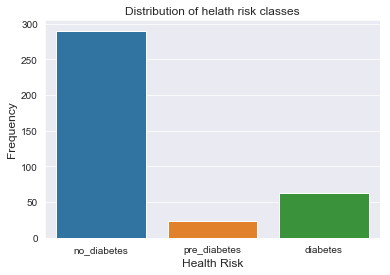

In [50]:
# Class distribution for health_risk 
sns.countplot(x='health_risk', data=df,
              order=['no_diabetes', 'pre_diabetes', 'diabetes'])
plt.title('Distribution of helath risk classes')
plt.xlabel('Health Risk', size=12)
plt.ylabel('Frequency', size=12)

plt.show()

Let's define a small helper funtcion which displays count and percentage per class of one feature.

In [51]:
def class_count(ser):
    # input is one column of dataframe = Series
    # value_counts() produces another Pandas Series
    pd_sr = ser.value_counts()
    n = len(ser)
    # get the name of Series
    ser_name = ser.name
    print()
    print('{}:'.format(ser_name),'\t', 'Count:', '\t', '%')

    for i in pd_sr.index:
        print(i,'\t',pd_sr[i], '\t\t', round(100*pd_sr[i]/n,2))

Let's now run the above function and display <code style="color:steelblue">health_risk</code> distribution:

In [52]:
class_count(df.health_risk)


health_risk: 	 Count: 	 %
no_diabetes 	 290 		 76.92
diabetes 	 63 		 16.71
pre_diabetes 	 24 		 6.37


In our sample the majority of people (76.92%) is in the normal A1C range. Around 6.37% have a higher chance of getting diabetes and 16.71% have diabetes.

We have the IMBALANCED dataset with:

* **majority class** - <code>no_diabetes</code> 

* **minority classes** - <code>pre_diabetes</code> and <code>diabetes</code>


In [53]:
df.head()

,chol,hdl,chol_ratio,a1c,age,gender,frame,waist,bp_s,bp_d,bmi,whr,health_risk
0,203.0,56.0,3.6,4.31,46,female,medium,29.0,118.0,59.0,22.1,0.76,no_diabetes
1,165.0,24.0,6.9,4.44,29,female,large,46.0,112.0,68.0,37.4,0.96,no_diabetes
2,228.0,37.0,6.2,4.64,58,female,large,49.0,187.5,92.0,48.4,0.86,no_diabetes
3,78.0,12.0,6.5,4.63,67,male,large,33.0,110.0,50.0,18.6,0.87,no_diabetes
4,249.0,28.0,8.9,7.72,64,male,medium,44.0,138.0,80.0,27.8,1.07,diabetes


**Prepare the target variable for models**

It is time now to start preparing the target variable <code style="color:steelblue">health_risk</code> for models. We are going to convert non-numeric class labels to numeric labels.

In [54]:
# convert non-numeric class labels to numeric labels
# according to the dictionary's mapping
hr = {'no_diabetes':0, 'pre_diabetes': 1, 'diabetes': 2}
y_hrisk = df['health_risk'].map(hr)

Finally, we have a target variable for the models: <code style="color:steelblue">y_hrisk</code>.

In [55]:
# display first 5 labels
y_hrisk.head()

0    0
1    0
2    0
3    0
4    2
Name: health_risk, dtype: int64

In [56]:
# display type of y_hrisk
print(type(y_hrisk))

# display unique values of y_hrisk
print(y_hrisk.unique())

<class 'pandas.core.series.Series'>
[0 2 1]


We have confirmed that <code style="color:steelblue">y_hrisk</code> has 3 unique labels: 0, 1 , 2.

Let's now add it to our dataframe as <code style="color:steelblue">h_risk</code> feature. At the same time we will drop the feature <code style="color:steelblue">a1c</code>.


In [57]:
# drop the a1c column and add previously defined y_hrisk as new numeric feature h_risk
df.drop('a1c', axis=1, inplace=True)
df['h_risk'] = y_hrisk

df.head()

,chol,hdl,chol_ratio,age,gender,frame,waist,bp_s,bp_d,bmi,whr,health_risk,h_risk
0,203.0,56.0,3.6,46,female,medium,29.0,118.0,59.0,22.1,0.76,no_diabetes,0
1,165.0,24.0,6.9,29,female,large,46.0,112.0,68.0,37.4,0.96,no_diabetes,0
2,228.0,37.0,6.2,58,female,large,49.0,187.5,92.0,48.4,0.86,no_diabetes,0
3,78.0,12.0,6.5,67,male,large,33.0,110.0,50.0,18.6,0.87,no_diabetes,0
4,249.0,28.0,8.9,64,male,medium,44.0,138.0,80.0,27.8,1.07,diabetes,2


### Checking correlations 

After cleaning dataframe, it is time to check correlations one more time. This time based on the health risk for diabetes.

Again we are going to sort features, but this time in order of their correlation with health risk (<code style="color:steelblue">h_risk</code>). 

In [58]:
# Calculate correlations between numeric features
correlations = df.corr()

# sort features in order of their correlation with health risk (h_risk)
sort_corr_cols = correlations.h_risk.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,h_risk,age,chol_ratio,waist,whr,chol,bp_s,bmi,bp_d,hdl
h_risk,1.000000,0.358264,0.312965,0.258852,0.243884,0.225894,0.222878,0.135581,0.037985,-0.140111
age,0.358264,1.000000,0.165961,0.150054,0.284849,0.254901,0.454645,-0.011996,0.074718,0.027971
chol_ratio,0.312965,0.165961,1.000000,0.308856,0.247888,0.477736,0.089232,0.227548,0.016238,-0.683980
waist,0.258852,0.150054,0.308856,1.000000,0.524578,0.119513,0.205362,0.817837,0.187407,-0.285098
whr,0.243884,0.284849,0.247888,0.524578,1.000000,0.100126,0.146315,0.108751,0.078075,-0.162186
chol,0.225894,0.254901,0.477736,0.119513,0.100126,1.000000,0.202727,0.087380,0.174391,0.187278
bp_s,0.222878,0.454645,0.089232,0.205362,0.146315,0.202727,1.000000,0.112855,0.617349,0.054596
bmi,0.135581,-0.011996,0.227548,0.817837,0.108751,0.087380,0.112855,1.000000,0.161525,-0.246167
bp_d,0.037985,0.074718,0.016238,0.187407,0.078075,0.174391,0.617349,0.161525,1.000000,0.095576
hdl,-0.140111,0.027971,-0.683980,-0.285098,-0.162186,0.187278,0.054596,-0.246167,0.095576,1.000000


Let's visualize this.

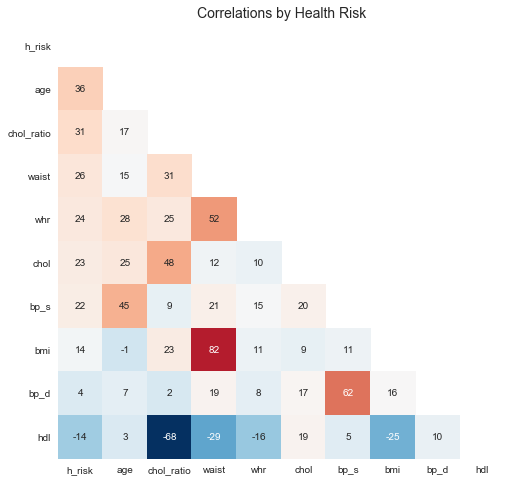

In [59]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 8x8
plt.figure(figsize=(8,8))

# Plot heatmap of annotated correlations; change background to white
with sns.axes_style('white'):
    sns.heatmap(sort_corr*100, 
                cmap='RdBu_r', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)

plt.title('Correlations by Health Risk', fontsize=14)
plt.yticks(rotation=0)
plt.show()

As expected, the result is similar to the correlations before data cleaning and feature engineering.

There are few obvious stronger correlations:

* <code style="color:steelblue">waist</code> with <code style="color:steelblue">whr</code> and <code style="color:steelblue">bmi</code>

* blood presure measurements

* cholesterol ratio and <code style="color:steelblue">chol</code> and <code style="color:steelblue">hdl</code>

But there are only few week correlations with <code style="color:steelblue">h_risk</code>:

* <code style="color:steelblue">age</code>, <code style="color:steelblue">chol_ratio</code>, <code style="color:steelblue">waist</code>

### Pairplot for numeric features by health_risk

Let's use Seaborn's <code>.pairplot()</code> function for additional analysis.

It plots only numerical features and we will use categorical feature of our target (<code style="color:steelblue">health_risk</code>) for coloring.

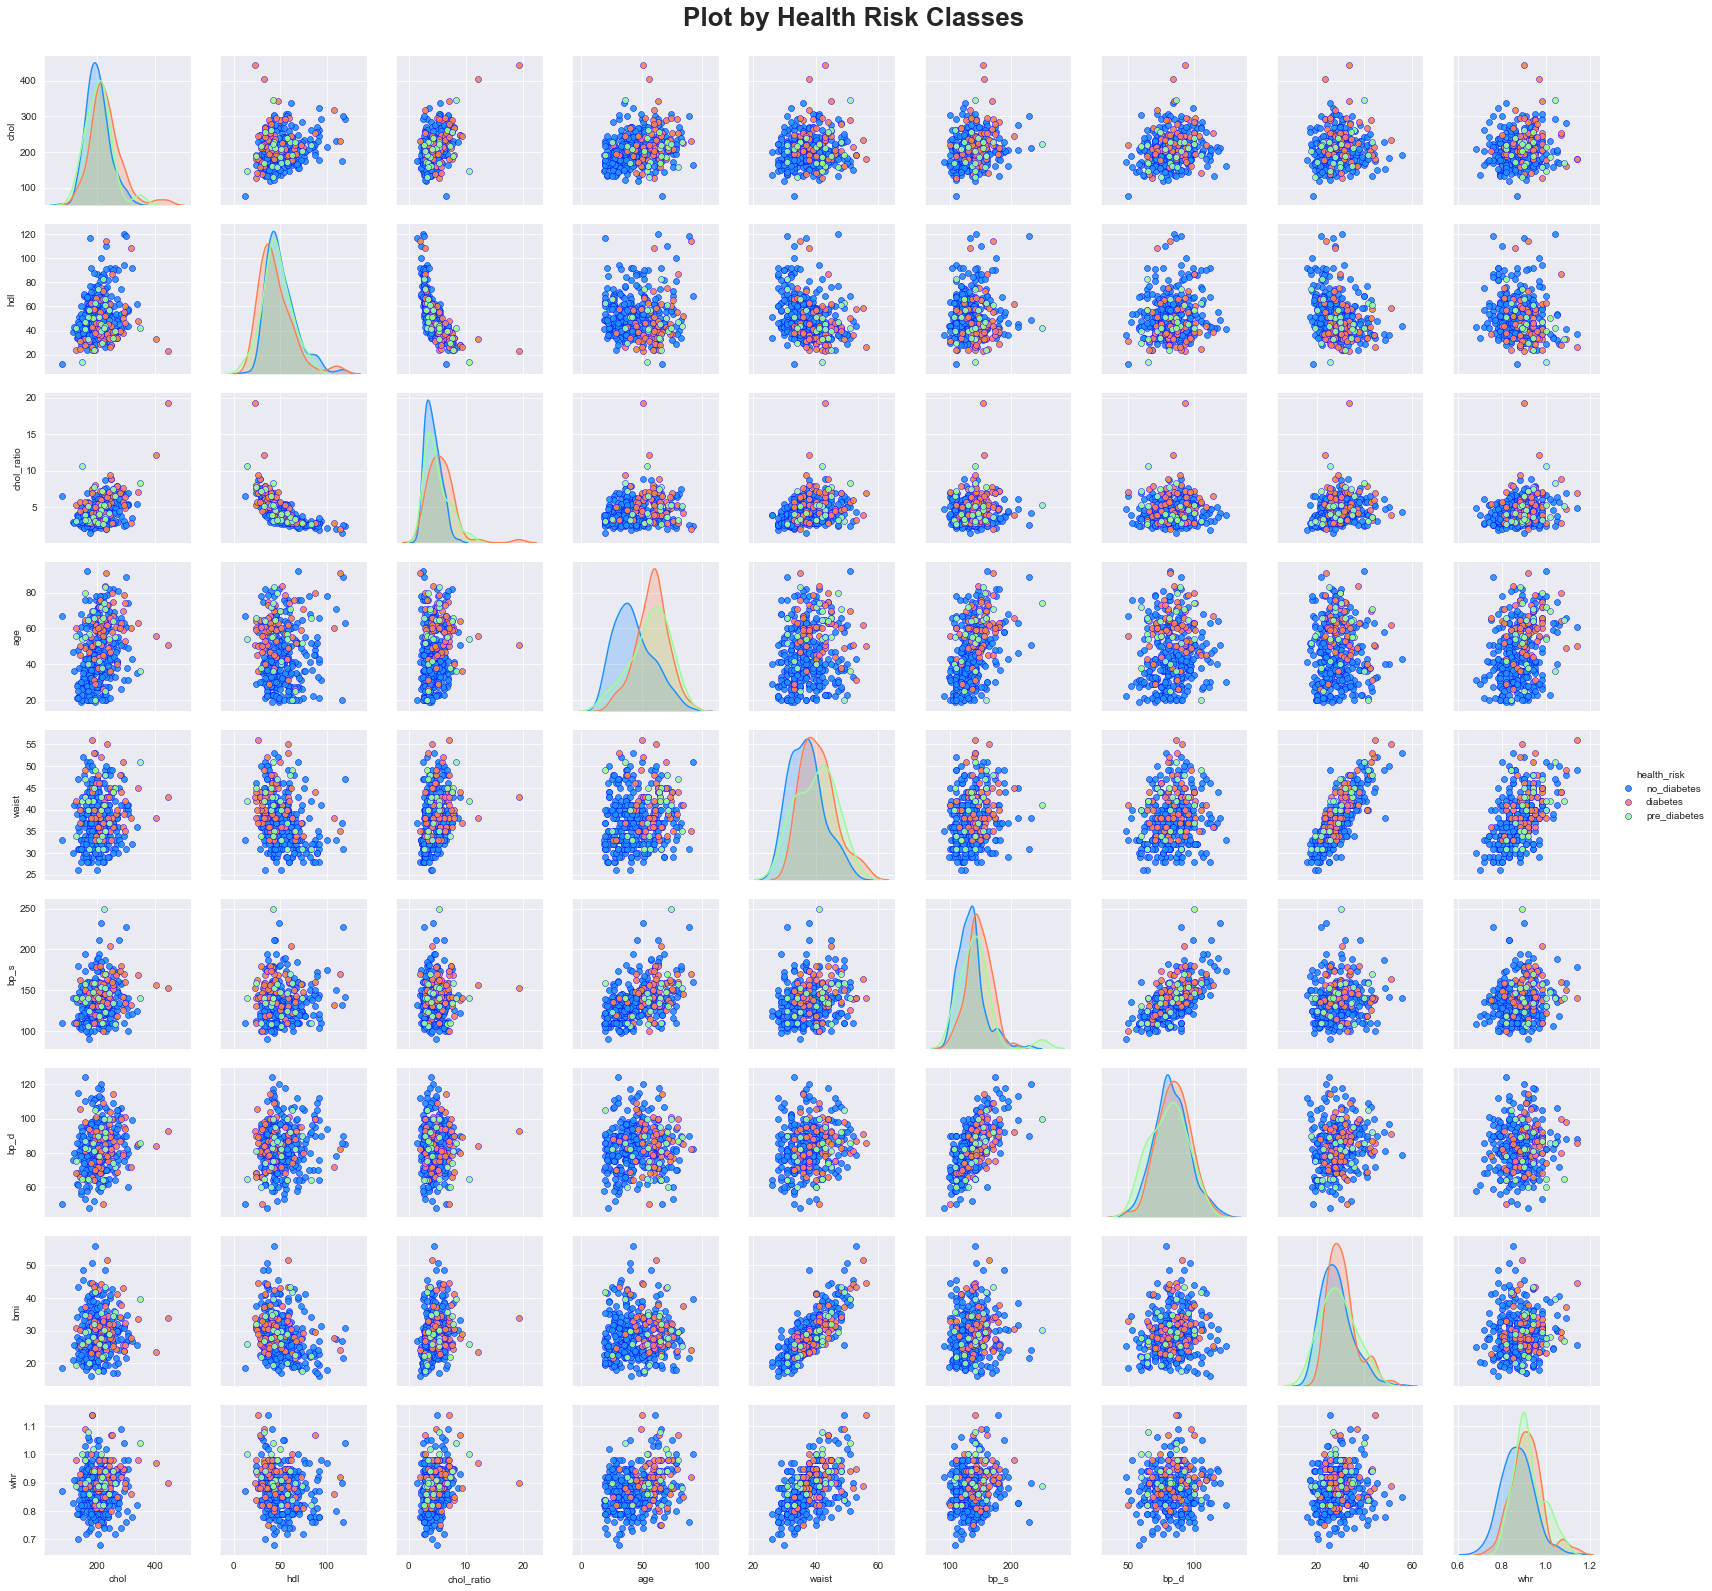

In [60]:
# Plot Seaborn's pairplot
g = sns.pairplot(df.drop('h_risk', axis=1),
                 hue='health_risk',
                 palette={'diabetes' : 'coral', 'pre_diabetes' : 'palegreen',
                          'no_diabetes' : 'dodgerblue'},
                 plot_kws={'alpha' : 0.9, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by Health Risk Classes',
             fontsize=26,
             fontweight='bold')

# save the plot for easier analyzing out of notebook
g.savefig('Figures/pairplot_health_risk.png')

We have saved the plot so we could analyze it out of the notebook with any picture viewer.

At the first glance from the *scatter plots* we could notice few correlations like from the correlation heatmap.

Distributions of health risk classes is almost identical for each pair of features.

The *density plots* on the diagonal make it easier to compare these distributions. We can notice that only few pairs of features have slightly different distributions. For example, from the density plot for <code style="color:steelblue">age</code>, it could be seen that younger people has lees chance to have diabetes.


Let’s reduce the clutter by plotting only four features: three with the strongest correlations with health risk (<code style="color:steelblue">age</code>, <code style="color:steelblue">chol_ratio</code>, <code style="color:steelblue">waist</code>) and <code style="color:steelblue">bmi</code>.

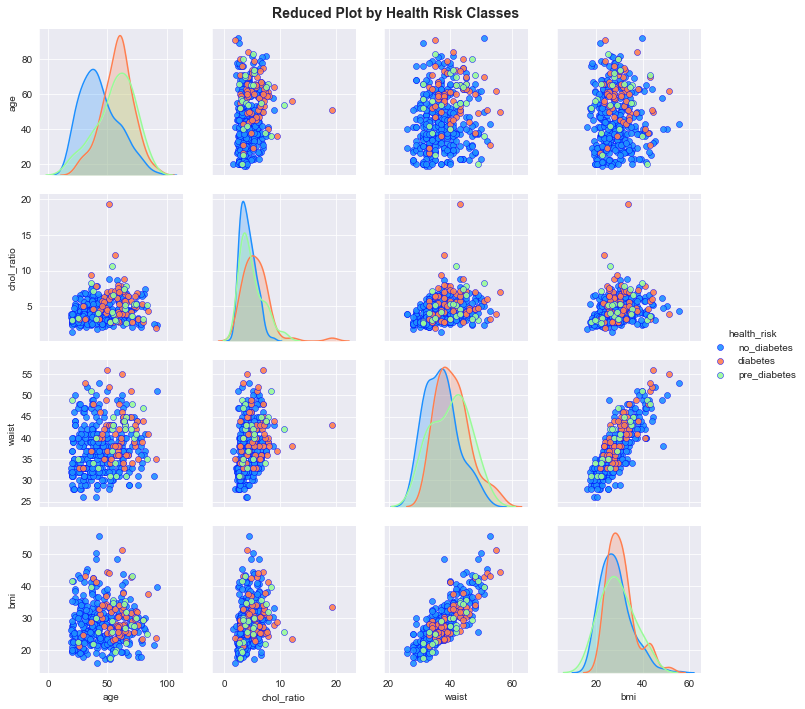

In [61]:
# Plot Seaborn's pairplot
g = sns.pairplot(df.drop('h_risk', axis=1),
                 vars=['age','chol_ratio', 'waist', 'bmi'], # reduce to less features
                 hue='health_risk',
                 palette={'diabetes' : 'coral', 'pre_diabetes' : 'palegreen',
                          'no_diabetes' : 'dodgerblue'},
                 plot_kws={'alpha' : 0.9, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by Health Risk Classes',
             fontsize=14,
             fontweight='bold')

# save the plot
g.savefig('Figures/pairplot_health_risk_r.png')

This looks much nicer! It is confirming the previous conclusions:

* There are very few and relatively weak correlations between health risk classes and other features

This might cause problems for models to diferentiate among classes.

### Health risk vs. age and BMI

First, let's use a groupby to show detailed statistics by class.

In [62]:
# Segment by health_risk and display the means within each class
df.groupby(by='health_risk').mean().sort_values('h_risk')

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,h_risk
health_risk,,,,,,,,,,
no_diabetes,202.831034,51.741379,4.244483,43.586207,37.134483,134.234483,82.998276,28.368621,0.870724,0.0
pre_diabetes,206.541667,47.125000,4.916667,56.666667,40.125000,141.437500,80.625000,29.141667,0.922083,1.0
diabetes,230.793651,45.507937,5.700000,58.555556,40.920635,147.500000,84.746032,30.800000,0.914286,2.0


Next, we will segment two key numeric features (<code style="color:steelblue">age</code> and <code style="color:steelblue">bmi</code>) by the targte variable <code style="color:steelblue">health_risk</code>.

We will use **violin plots** for that.

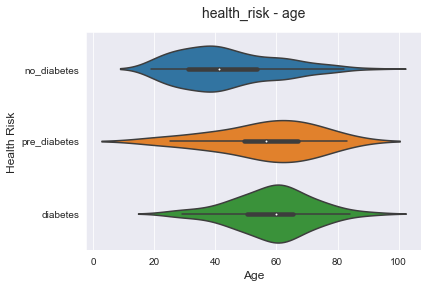

In [63]:
# Segment age by health_risk and plot distributions
sns.violinplot(y='health_risk', x='age', data=df,
            order=['no_diabetes', 'pre_diabetes','diabetes'])

plt.title('health_risk - age', fontsize=14, pad=15)
plt.xlabel('Age',size=12)
plt.ylabel('Health Risk', size=12)
plt.show()

The above plot is showing us that age is one of the key factors for diabetes risk. The age median and mean for risk classes are separated, but the variance is so high. That means that we have to look at many other factors that could contribute to higher risks for diabetes.

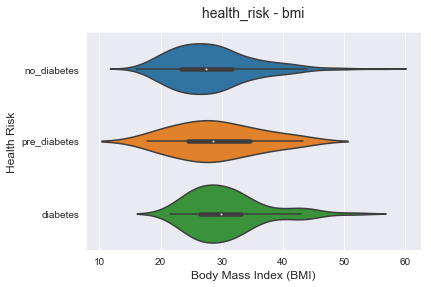

In [64]:
# Segment bmi by health_risk and plot distributions
sns.violinplot(y='health_risk', x='bmi', data=df,
            order=['no_diabetes', 'pre_diabetes','diabetes'])

plt.title('health_risk - bmi', fontsize=14, pad=15)
plt.xlabel('Body Mass Index (BMI)',size=12)
plt.ylabel('Health Risk', size=12)
plt.show()

Similar to the previous plot, higher bmi could lead to diabetes risk increase. But the variance is high and there is no strong direct correlation for that.

Let's now plot a bivariate segmentation for <code style="color:steelblue">bmi</code> and <code style="color:steelblue">age</code> segmented by <code style="color:steelblue">health_risk</code>.

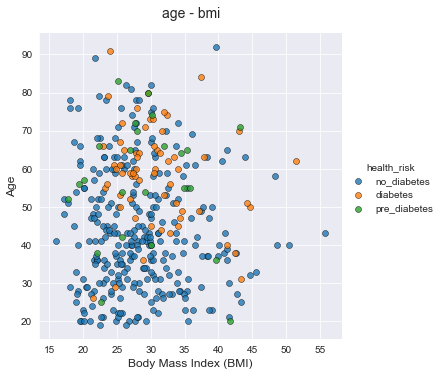

In [65]:
# Scatterplot of bmi vs. age
sns.lmplot(x='bmi',
           y='age',
           data=df,
           hue='health_risk',
           fit_reg=False,
           scatter_kws={'alpha':0.8, 'edgecolor':'k','linewidth':0.5})

plt.title('age - bmi', fontsize=14, pad=15)
plt.xlabel('Body Mass Index (BMI)',size=12)
plt.ylabel('Age', size=12)
plt.show()

From this chart we can see less <code>diabetes</code> and <code>pre_diabetes</code> observations and more <code>no_diabetes</code> observations for lower <code style="color:steelblue">age</code> and lower <code style="color:steelblue">bmi</code>. 

### Finalizing the dataset

To finally finish data preparation we will:

* get dummy variables for both categorical features and create the new dataframe: **abt**

* drop categorical version (<code style="color:steelblue">health_risk</code>) of our target variable

**Create dummy variables for all categorical features: *frame* and *gender***

In [66]:
# Get dummy variables for frame and gender
# Create new dataframe with dummy features
abt = pd.get_dummies(df, columns=['frame', 'gender'])

abt.head()

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,health_risk,h_risk,frame_Missing,frame_large,frame_medium,frame_small,gender_female,gender_male
0,203.0,56.0,3.6,46,29.0,118.0,59.0,22.1,0.76,no_diabetes,0,0,0,1,0,1,0
1,165.0,24.0,6.9,29,46.0,112.0,68.0,37.4,0.96,no_diabetes,0,0,1,0,0,1,0
2,228.0,37.0,6.2,58,49.0,187.5,92.0,48.4,0.86,no_diabetes,0,0,1,0,0,1,0
3,78.0,12.0,6.5,67,33.0,110.0,50.0,18.6,0.87,no_diabetes,0,0,1,0,0,0,1
4,249.0,28.0,8.9,64,44.0,138.0,80.0,27.8,1.07,diabetes,2,0,0,1,0,0,1


**Remove categorical version of our target variable**

In [67]:
# Drop health_risk feature
abt.drop(['health_risk'], axis=1, inplace=True)

abt.head()

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,h_risk,frame_Missing,frame_large,frame_medium,frame_small,gender_female,gender_male
0,203.0,56.0,3.6,46,29.0,118.0,59.0,22.1,0.76,0,0,0,1,0,1,0
1,165.0,24.0,6.9,29,46.0,112.0,68.0,37.4,0.96,0,0,1,0,0,1,0
2,228.0,37.0,6.2,58,49.0,187.5,92.0,48.4,0.86,0,0,1,0,0,1,0
3,78.0,12.0,6.5,67,33.0,110.0,50.0,18.6,0.87,0,0,1,0,0,0,1
4,249.0,28.0,8.9,64,44.0,138.0,80.0,27.8,1.07,2,0,0,1,0,0,1


### Save the dataframe as the analytical base table

In [68]:
# Save analytical base table
abt.to_csv('Data/analytical_base_table.csv', index=None)

## Algorithm Selection

We have transformed the original dataset to the **multi-class classification task**.
The chosen algorithms are all known to work well in this kind of task:

1. $L_1$-regularized Logistic Regression

2. $L_2$-regularized Logistic Regression

3. Support Vector Machine (SVM)

4. Random Forest

5. Gradient Boosting

6. AdaBoost

Tree ensembles algorithms often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from all classes. This is one more reason to choose the last three algorithms.

We have tuned our models with ten-fold cross validation to obtain generalisation of accuracies and errors.

**Dictionary `'models'`**

We are going to create the dictionary `models` with names of algorithms. We will be using it later for plotting and displaying results of the models.

In [69]:
# Create models dictionary, it will be needed for ploting
models = {
    'l1' : 'Logistic Regression - L1',
    'l2' : 'Logistic Regression - L2',
    'svm' : 'Support Vector Machine (SVM)',
    'rf' : 'Random Forest',
    'gb' : 'Gradient Boosting',
    'ab' : 'AdaBoost'
}

#### Imbalanced Dataset

As we discovered earlier, we are working with the *imbalanced classes*:

In [70]:
class_count(df.health_risk)


health_risk: 	 Count: 	 %
no_diabetes 	 290 		 76.92
diabetes 	 63 		 16.71
pre_diabetes 	 24 		 6.37


As we are dealing with classification model, straight **accuracy score** is not the best option for measuring performance. Especially, it is not a good metric for evaluating *imbalanced classes* in the target variable.

The **macro averaged f1 score** metric is believed to be better option for the imbalanced classes. So, we will use it in:

1. <code>GridSearchCV()</code> as the scorer argument to take the performance metrics at each CV iteration (holdout folds)

2. the final evaluation of models to be compared with the accuracy score

#### Techniques for handling imbalanced classes

We are going to train models in 4 groups. In each group, except the first one, we will use one of the techniques for handling imbalanced classes:

* A. Plain models (**pm**)

* B. Macro averaged f1 score as a performance metric (**f1**)

* C. Cost-Sensitive Learning with f1_macro (**cs**) 

* D. SMOTE - Synthetic Minority Over-sampling Technique with f1_macro (**sm**)

#### Variable 'target_names'

Let's now set this variable. It will be used later for printing evaluation results.

In [71]:
target_names = ['no_diabetes', 'pre_diabetes', 'diabetes']

## Model Training

Let's start by splitting our dataframe into separate objects: 

* <code style="color:steelblue">y</code> for the target varibale

* <code style="color:steelblue">X</code> for the input features

**Separate dataframe into separate objects**

In [72]:
# Display first 3 rows
abt.head(3)

,chol,hdl,chol_ratio,age,waist,bp_s,bp_d,bmi,whr,h_risk,frame_Missing,frame_large,frame_medium,frame_small,gender_female,gender_male
0,203.0,56.0,3.6,46,29.0,118.0,59.0,22.1,0.76,0,0,0,1,0,1,0
1,165.0,24.0,6.9,29,46.0,112.0,68.0,37.4,0.96,0,0,1,0,0,1,0
2,228.0,37.0,6.2,58,49.0,187.5,92.0,48.4,0.86,0,0,1,0,0,1,0


In [73]:
# Object for target variable
y = abt.h_risk

# object for input features
X = abt.drop(['h_risk'], axis=1)

# display shapes of X and y
print(X.shape, y.shape)

(377, 15) (377,)


**Split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets**

We will continue with splitting our data into separate training and test sets.

* 30% of observations will be set aside for the test set

* the rest, 70%, will be used as the training set

In [74]:
# Define random_state; we will use it through the notebook
random_state = 789

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=abt.h_risk)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

263 114 263 114


### Helper Functions

We will write several helper functions that will be used later in the project:

1. **fit_tune_CV(*pipe, scorer*)** - fit and tune models with cross validation

2. **evaluation(*fit_models*)** - evaluate models (base score, f1_average, accuracy)

3. **eval_plot(*eval_df*)** - plot evaluation metrics for all models

4. **plot_conf_mat_w_and_wo_norm(*fit_models, model_id, color*)** - plot one model's confusion matrix heatmaps without and with normalization

5. **plot_norm_conf_matrices(*fit_models, color*)** - plot normalized confusion matrix heatmaps for all fitted models

6. **class_rep_cm(*fit_models, model_id*)** - display classification report and confusion matrix for one fitted model

7. **best_hyp_param(*fit_models*)** - display best hyperparameters for all fitted models

**1. Defining the function for fiting and tuning models with cross-validation**

<pre>input: the pipeline and scorer
output: fitted models dictionary</pre>


In [75]:
def fit_tune_CV(pipe, scorer):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

    # Create empty dictionary called fitted_models
    fit_models = {}

    # Loop through model pipelines, tuning each one and saving it to fitted_models
    for name, pipeline in pipe.items():
        # Create cross-validation object from pipeline and hyperparameters
        model = GridSearchCV(pipeline, hyperparameters[name], cv=skf,
                             scoring=scorer, iid=True, n_jobs=-1)

        # Fit model on X_train, y_train
        model.fit(X_train, y_train)

        # Store model in fitted_models[name]
        fit_models[name] = model

        # Print '{name} has been fitted'
        print(name, 'has been fitted')
    return fit_models

**2. The function for creating the dataframe with evaluation metrics for each model.**

<pre>input: fitted models dictionary
output: evaluation metrics dataframe</pre>

In [76]:
def evaluation(fit_models):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)
        lst.append([name, model.best_score_, f1_score(y_test, pred, average='macro'),
                    accuracy_score(y_test, pred)])

    eval_df = pd.DataFrame(lst, columns=['model', 'CV_score', 'f1_macro', 'accuracy'])
    eval_df.set_index('model', inplace = True)
    return eval_df

**3. The function for plotting evaluation metrics for each model.**

<pre>input: dataframe with evaluation metrics
output: evaluation metrics plot</pre>

In [77]:
def eval_plot(eval_df):
    #eval_df = evaluation(fit_models)
    eval_dfp = eval_df.reset_index()
    eval_dfp = pd.melt(eval_dfp,id_vars='model',var_name='metrics', value_name='score')
    
    sns.catplot(x='model', y='score', hue='metrics',data=eval_dfp, kind='bar',
                palette={'CV_score' : 'red', 'f1_macro' : 'orange',
                          'accuracy' : 'royalblue'})
    plt.title('Evaluation Metrics', fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlabel('Model', size=12)
    plt.ylabel('Score', size=12)
    plt.show()

**4. The function for ploting one model's confusion matrix heatmaps without and with normalization.**

<pre>input: fitted models dictionary, models dictionary and dictionary key for one model, colormap for heatmaps
output: plot of two heatmaps</pre> 

In [78]:
def plot_conf_mat_w_and_wo_norm(fit_models, models, model_id, color):
    # Plot confusion matrix heatmaps
    pred = fit_models[model_id].predict(X_test)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle(models[model_id], fontsize=14)
    f.subplots_adjust(top=0.85, wspace=0.3)

    # confusion matrix without normalization
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='d',
                cbar=True,
                square=True,
                cmap=color,
                ax=ax1)

    ax1.set_xticklabels(labels=target_names)
    ax1.set_yticklabels(labels=target_names, va='center')
    ax1.set_title('Confusion Matrix w/o Normalization')
    ax1.set_xlabel('Predicted Labels', size=12)
    ax1.set_ylabel('True Labels', size=12)

    # normalized confusion matrix
    matn = mat / mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matn,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='.2f',
                cbar=True,
                square=True,
                cmap=color,
                vmin = 0,
                vmax = 1,
                ax=ax2)

    ax2.set_xticklabels(labels=target_names)
    ax2.set_yticklabels(labels=target_names, va='center')
    ax2.set_title('Normalized Confusion Matrix')
    ax2.set_xlabel('Predicted Label', size=12)
    ax2.set_ylabel('True Label', size=12)

    plt.show()

**5. The helper function for ploting heatmaps for normalized confusion matrices for all models.**

<pre>input: fitted models dictionary, models dictionary and colormap for heatmaps
output: plot of heatmaps for each model</pre>

In [79]:
def plot_norm_conf_matrices(fit_models, models, color):
    # Prepare lists of coordinates for axes
    lt = []  # list for full subplots
    ltd = []  # list for empty subplots
    col = 2  # number of columns
    n_mod = len(fit_models)  # number of fitted models
    
    # Number of rows
    row = - (n_mod // -col)
    
    # Create lists of coordinates for full and empty subplots
    for r in range(row):
        for c in range(col):
            if n_mod >= (r + 1) * (c + 1):
                lt.append([r, c])
            else:
                ltd.append([r, c])
    
    # Create figure and subplots
    figs_y = row * 4  # y size
    f, axs = plt.subplots(row, col, figsize=(10, figs_y))
    f.suptitle('Normalized Confusion Matrices', fontsize=14)
    f.subplots_adjust(top=0.94, wspace=0.90, hspace=0.2)
    
    # Reshape axes; needed in case of only 1 row
    axs = axs.reshape(row,-col)

    # Loop to delete N last empty subplots (if any)
    for n in range(len(ltd)):
        r = ltd[n][0]
        c = ltd[n][1]
        f.delaxes(ax= axs[r, c])
        
    # Loop to plot all full subplots
    i = 0
    # Loop for each fitted model        
    for id, model in fit_models.items():
        pred = model.predict(X_test)
        name = models[id]
        r = lt[i][0]
        c = lt[i][1]
        i += 1
     
        mat = confusion_matrix(y_test, pred)    
        # normalized confusion matrix
        matn = mat / mat.sum(axis=1)[:, np.newaxis]

        ax = axs[r, c]
        sns.heatmap(matn,
                    annot=True,
                    annot_kws=dict(fontsize=14),
                    fmt='.2f',
                    cbar=False,
                    square=True,
                    cmap=color,
                    vmin = 0,
                    vmax = 1,
                    #cbar_kws = {'shrink' : 0.85},
                    ax=ax)
    
        ax.set_xticklabels(labels=target_names)
        ax.set_yticklabels(labels=target_names, va='center')
        ax.set_title(name)
        ax.set_xlabel('Predicted Label', size=12)
        ax.set_ylabel('True Label', size=12)

    plt.show()

**6. The helper function for displaying confusion matrix and classification report.**

<pre>input: fitted models dictionary, models dictionary and a dictionary key for one of the models
output: confusion matrix dataframe and classification report</pre>

In [80]:
def class_rep_cm(fit_models, models, model_id):
    # Predict classes using model_id
    pred = fit_models[model_id].predict(X_test)
    print()
    print('\t', models[model_id])
    print('\t', '='*len(models[model_id]))

    # Display confusion matrix for y_test and pred
    conf_df = pd.DataFrame(confusion_matrix(y_test, pred), columns=target_names, index=target_names)
    conf_df.index.name = 'True Labels'
    conf_df = conf_df.rename_axis('Predicted Labels', axis='columns')
    display(conf_df)
    
    # Display classification report
    print()
    print(classification_report(y_test, pred, target_names=target_names))


**7. The helper function to display best_params_ for each fitted model.**

<pre>input: fitted models dictionary and models dictionary
output: best_params_ dataframe</pre>

In [81]:
def best_hyp_param(fit_models, models):
    # Display best_params_ for each fitted model

    # Initialize empty dataframe
    bp_df = pd.DataFrame()

    # Loop through all fitted models
    for name, model in fit_models.items():
        # Dictionary of best_params
        d = model.best_params_
        # Model name from model dictionary
        model_name = models[name]
        
        # Create dataframe for best_params_dictionary
        bp_dft = pd.DataFrame.from_dict(d, orient='index', columns=['Value'])
        # Insert the column 'Model'
        bp_dft.insert(0, 'Model', model_name)
        # Concatenate previous dataframe with new one from this run
        bp_df = pd.concat([bp_df, bp_dft])

    # Finalize the output of the dataframe
    bp_df.reset_index(inplace=True)
    bp_df.set_index('Model', inplace = True)
    bp_df.rename(columns={'index' : 'Hyperparameter'}, inplace=True)
    return bp_df

### A. Plain models 

In this group we will train just plain models. The estimator's default scorer (if available) will be used.

#### Build Model Pipelines

Create a pipeline dictionary with pipelines for each algorithm

In [82]:
# Pipeline dictionary
pipelines_pm = {
    'l1' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                            random_state=random_state)),
    'l2' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2', multi_class='multinomial',
                                            random_state=random_state)),
    'svm' : make_pipeline(StandardScaler(), SVC(random_state=random_state)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=random_state)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=random_state)),
    'ab' : make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=random_state))
}

### Declare Hyperparameters Grids

Next, we are going to declare hyperparameters to tune for all models.

These hyperparameters grids will be used in all model groups.

#### Hyperparameter grids for  logistic regression

In [83]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

l2_hyperparameters = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'logisticregression__solver' : ['newton-cg', 'lbfgs', 'sag']
}

#### Hyperparameter grid for SVM

In [84]:
# SVM hyperparameters
svm_hyperparameters = { 
    'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
    'svc__gamma': [5, 1, 0.1, 0.01]
}

#### Hyperparameter grid for random forest

In [85]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]
}

#### Hyperparameter grid for the boosted tree

In [86]:
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200, 300],
    'gradientboostingclassifier__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
    'gradientboostingclassifier__max_depth' : [2, 3, 4]
}

#### Hyperparameter grid for AdaBoost

In [87]:
# AdaBoost hyperparameters
ab_hyperparameters = {
    'adaboostclassifier__n_estimators' : [50, 100, 200],
    'adaboostclassifier__learning_rate' : [0.005, 0.01, 0.05, 0.1, 0.2]
}

#### Store all declared hyperparamters in a dictionary

Finally, we will store all our declared hyperparameters in a dictionary <code style="color:steelblue">hyperparameters</code>.

We are going to use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.

In [88]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'svm' : svm_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'ab' : ab_hyperparameters
}

### Fit and Tune Models with Cross-Validation

We will run the function `fit_tune_CV` to fit and tune with cross validation all models

In [89]:
# Fit and tune models with cross-validation
fitted_models_pm = fit_tune_CV(pipelines_pm, None)

l1 has been fitted
l2 has been fitted
svm has been fitted
rf has been fitted
gb has been fitted
ab has been fitted


### Display evaluation metrics

Let's now check the metrics for our models:

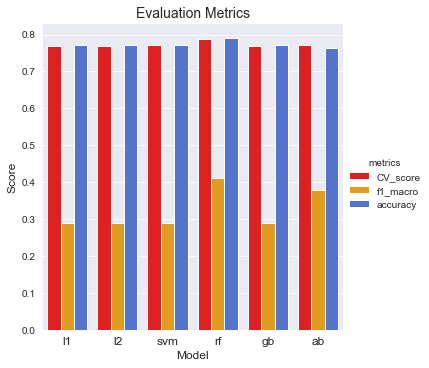

,CV_score,f1_macro,accuracy
model,,,
l1,0.768061,0.290429,0.771930
l2,0.768061,0.290429,0.771930
svm,0.771863,0.290429,0.771930
rf,0.787072,0.410081,0.789474
gb,0.768061,0.290429,0.771930
ab,0.771863,0.380148,0.763158


In [90]:
# Plot and display evaluation metrics for simple plain models
eval_df_pm = evaluation(fitted_models_pm)
eval_plot(eval_df_pm)
display(eval_df_pm)

* In this group of models **Random Forest** has the best all scores.

* CV_scores are holdout accuracy scores. For classification tasks the default scoring metric is accuracy.

* Models were tuned to have the best accuracy score and this is why f1_macro scores are very low.

We are going to check now confusion matrices and classification reports to confirm that..

**Plot confusion matrix heatmaps for one model.**

Let's compare:

1. Confusion matrix without normalization (left)

2. Confusion matrix with normalization (right)

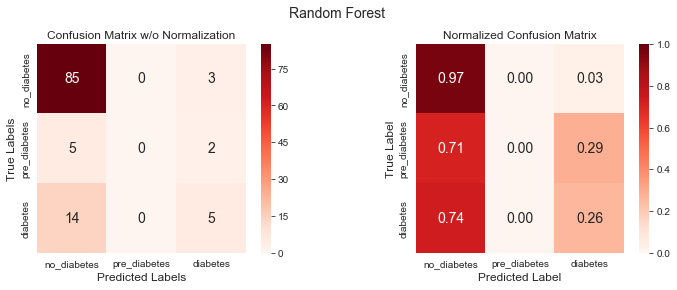

In [91]:
# Plot confusion matrix heatmaps without and with normalization
plot_conf_mat_w_and_wo_norm(fitted_models_pm, models, 'rf', 'Reds')                          

**A few notes about above heatmaps:**

* The diagonal elements in the confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

* The higher the diagonal values of the confusion matrix the better, indicating many correct predictions

* Due to heavy class imbalance, we should perform normalization by number of elements in each class to have a more visual interpretation of which class is being misclassified.

* For the normalized confusion matrix, the goal is to have darker (closer to 1.0) diagonal elments and brighter (closer to 0.0) off-diagonal elements.

* In our case it is obvious that lack of samples for two minority classes (<code>'diabetes'</code>, <code>'pre_diabetes'</code>) caused their misplacements


### Plot normalized confusion matrix heatmaps for all fitted models

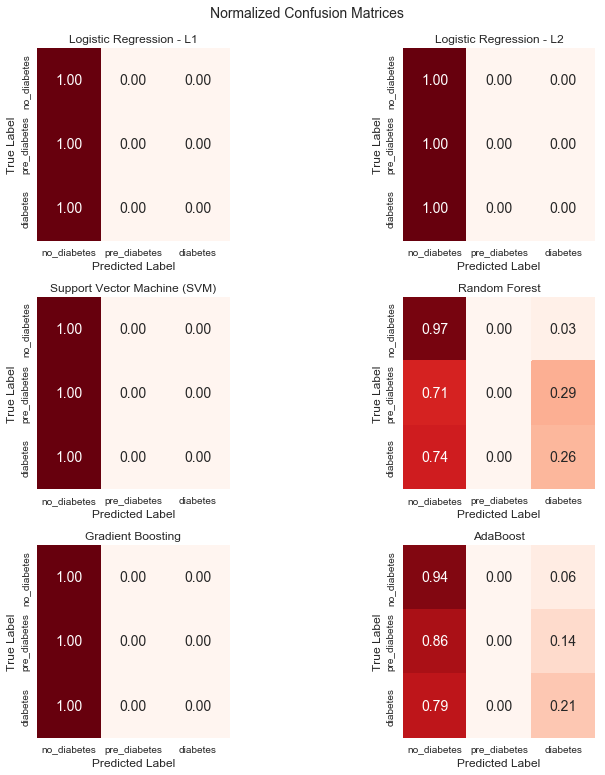

In [92]:
# Plot all confusion matrices for simple and plain models
plot_norm_conf_matrices(fitted_models_pm, models, 'Reds')

* It looks like the modules are predicting the majority class (<code>no_diabetes</code>) only. The recall for this class is 1.00 except for Random Forest (0.97) and AdaBoost (0.94).

* None of the modules predicted any label in the <code>pre_diabetes</code> class.

* Only Random Forest and AdaBoost predicted a few points in the <code>diabetes</code> class.


### Display confusion matrix and classification report for one or more models

Let's compare Random Forest and AdaBoost performances.

In [93]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_pm, models, 'rf')
class_rep_cm(fitted_models_pm, models, 'ab')


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,85,0,3
pre_diabetes,5,0,2
diabetes,14,0,5



              precision    recall  f1-score   support

 no_diabetes       0.82      0.97      0.89        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.50      0.26      0.34        19

   micro avg       0.79      0.79      0.79       114
   macro avg       0.44      0.41      0.41       114
weighted avg       0.71      0.79      0.74       114


	 AdaBoost


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,83,0,5
pre_diabetes,6,0,1
diabetes,15,0,4



              precision    recall  f1-score   support

 no_diabetes       0.80      0.94      0.86        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.40      0.21      0.28        19

   micro avg       0.76      0.76      0.76       114
   macro avg       0.40      0.38      0.38       114
weighted avg       0.68      0.76      0.71       114



* As we saw before, Random Forest has slightly better f1_macro score than AdaBoost.

* It is a winner for this group.

### Display best_params_ for all fitted models

Let's list the best hyperparameters for all fitted models.

In [94]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_pm, models)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.01
Logistic Regression - L2,logisticregression__C,0.01
Logistic Regression - L2,logisticregression__solver,newton-cg
Support Vector Machine (SVM),svc__C,0.01
Support Vector Machine (SVM),svc__gamma,0.1
Support Vector Machine (SVM),svc__kernel,poly
Random Forest,randomforestclassifier__criterion,gini
Random Forest,randomforestclassifier__max_features,0.33
Random Forest,randomforestclassifier__min_samples_leaf,5


### B. F1-macro score

In this group we will run just plain models with only one change. We are going  to change the performance metric for evalutating models. 

The **macro averaged f1 score metric** will be used as the scorer argument in GridSearchCV() and in the final evaluation of the models. It is better option for imbalanced classes than the 
accuracy score.


#### Build Model Pipelines

Create a pipeline dictionary with pipelines for each algorithm

In [95]:
# Pipeline dictionary
pipelines_f1 = {
    'l1' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                            random_state=random_state)),
    'l2' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2', multi_class='multinomial',
                                            random_state=random_state)),
    'svm' : make_pipeline(StandardScaler(), SVC(random_state=random_state)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=random_state)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=random_state)),
    'ab' : make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=random_state))
}

### Fit and Tune Models with Cross-Validation

We will run the function `fit_tune_CV` to fit and tune with cross validation all models

In [96]:
# Fit and tune models with cross-validation
fitted_models_f1 = fit_tune_CV(pipelines_f1, 'f1_macro')

l1 has been fitted
l2 has been fitted
svm has been fitted
rf has been fitted
gb has been fitted
ab has been fitted


### Display evaluation metrics

Let's now check the metrics for our models:

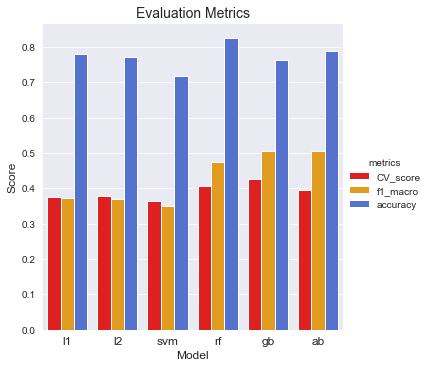

,CV_score,f1_macro,accuracy
model,,,
l1,0.376153,0.374365,0.780702
l2,0.377366,0.369116,0.771930
svm,0.364190,0.351267,0.719298
rf,0.405695,0.473797,0.824561
gb,0.427936,0.505279,0.763158
ab,0.395413,0.505135,0.789474


In [97]:
# Plot and display evaluation metrics for simple plain models
eval_df_f1 = evaluation(fitted_models_f1)
eval_plot(eval_df_f1)
display(eval_df_f1)

* In this group of models **Gradient Boosting** has the best f1 macro score (0.513450) and the CV-score (0.427936) as well.

* **Random Forest** has the best accuracy but all models have much higher accuracy because they are mostly predicting the majority class (<code>no_diabetes</code>).

We are going to check now confusion matrices and classification reports to see more details.

### Plot normalized confusion matrix heatmaps for all fitted models

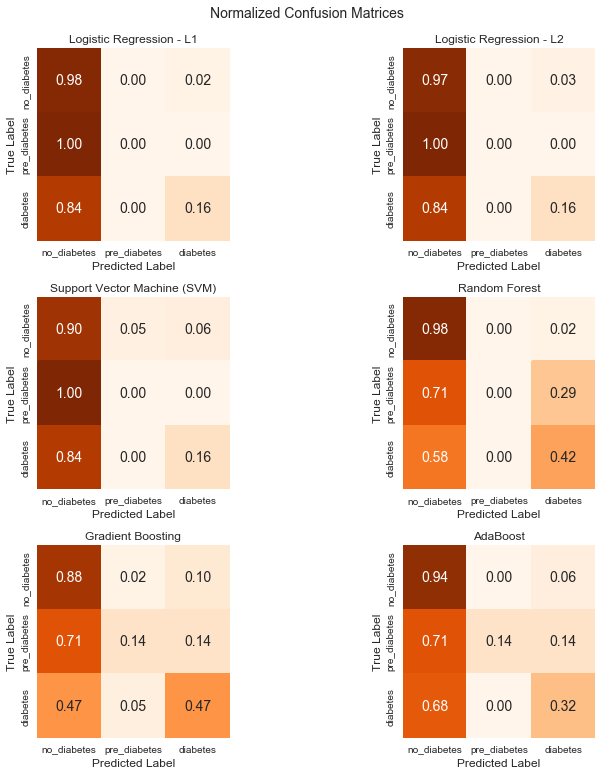

In [98]:
# Plot all confusion matrices for simple and plain models
plot_norm_conf_matrices(fitted_models_f1, models, 'Oranges')

The Gradient Boosting confusion matrix has the darkest diagonal elements. This is a visual indication of the model performance.

As it was expected, tree ensembles algorithms are performing best on our imbalanced dataset.

All models are having problems with minority classes, especially with the smallest one.

### Display confusion matrix and classification report for one or more models

Let's compare Gradient Boost and Random Forest performances.

In [99]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_f1, models, 'gb')
class_rep_cm(fitted_models_f1, models, 'rf')


	 Gradient Boosting


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,77,2,9
pre_diabetes,5,1,1
diabetes,9,1,9



              precision    recall  f1-score   support

 no_diabetes       0.85      0.88      0.86        88
pre_diabetes       0.25      0.14      0.18         7
    diabetes       0.47      0.47      0.47        19

   micro avg       0.76      0.76      0.76       114
   macro avg       0.52      0.50      0.51       114
weighted avg       0.75      0.76      0.75       114


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,86,0,2
pre_diabetes,5,0,2
diabetes,11,0,8



              precision    recall  f1-score   support

 no_diabetes       0.84      0.98      0.91        88
pre_diabetes       0.00      0.00      0.00         7
    diabetes       0.67      0.42      0.52        19

   micro avg       0.82      0.82      0.82       114
   macro avg       0.50      0.47      0.47       114
weighted avg       0.76      0.82      0.78       114



* As we saw before, Random Forest mostly predicts the majority class, recall=0.98, but it has 0 recall for the <code>pre_diabetes</code> class. 

* Gradient Boost is doing slightly better with minority classes and that makes it the winner of this group.

### Display best_params_ for all fitted models

Let's list the best hyperparameters for all fitted models.

In [100]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_f1, models)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.5
Logistic Regression - L2,logisticregression__C,0.1
Logistic Regression - L2,logisticregression__solver,newton-cg
Support Vector Machine (SVM),svc__C,0.5
Support Vector Machine (SVM),svc__gamma,5
Support Vector Machine (SVM),svc__kernel,sigmoid
Random Forest,randomforestclassifier__criterion,gini
Random Forest,randomforestclassifier__max_features,0.33
Random Forest,randomforestclassifier__min_samples_leaf,1


### C. Cost-Sensitive Learning

In this group we will use **cost-sensitive learning (penalize algorithms)**. They increase the cost of classification mistakes on the minority class.

Cost-sensitive learning is not supported by boosting algorithms so we will have 4 models in this group.

The argument <code>class_weight='balanced'</code> is used during training to penalize mistakes on the minority classes by an amount proportional to how under-represented they are.

We will do this slightly differently. First we will use compute_class_weight to calculate `'balanced'` class weights and then we will pass them to classifiers. This way we can print calculated weight classes:

<pre>
0: 0.43
1: 5.16
2: 1.99
</pre>

Compare this with the population of classes:
<pre>
0: 290
1: 24
2: 63
</pre>

In [101]:
# Define dictionary with class weights
class_weight_list = compute_class_weight('balanced', np.unique(y_train), y_train)

class_weights = dict(zip(np.unique(y_train), class_weight_list))
print(class_weights)

# count population of classes
print(Counter(abt.h_risk))

{0: 0.43399339933993397, 1: 5.1568627450980395, 2: 1.9924242424242424}
Counter({0: 290, 2: 63, 1: 24})


#### Build Model Pipelines

Create a pipeline dictionary with pipelines for each algorithm. 

Pass the class weights dictionary to the <code>class_weight</code> argument in classifiers.

In [102]:
# Pipeline dictionary for class_weight
pipelines_cs = {
    'l1' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                            class_weight=class_weights, random_state=random_state)),
    'l2' : make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2', multi_class='multinomial',
                                            class_weight=class_weights, random_state=random_state)),
    'svm' : make_pipeline(StandardScaler(),
                          SVC(class_weight=class_weights, random_state=random_state)),
    'rf' : make_pipeline(StandardScaler(),
                         RandomForestClassifier(class_weight=class_weights, random_state=random_state))
}

### Fit and Tune Models with Cross-Validation

In [103]:
# Fit and tune models with cross-validation
fitted_models_cs = fit_tune_CV(pipelines_cs, 'f1_macro')

l1 has been fitted
l2 has been fitted
svm has been fitted
rf has been fitted


### Display evaluation metrics

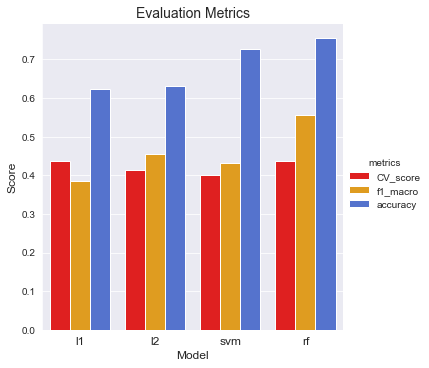

,CV_score,f1_macro,accuracy
model,,,
l1,0.436358,0.385859,0.622807
l2,0.414028,0.455797,0.631579
svm,0.401227,0.432931,0.728070
rf,0.438159,0.556052,0.754386


In [104]:
# Plot and display evaluation metrics for simple plain models
eval_df_cs = evaluation(fitted_models_cs)
eval_plot(eval_df_cs)
display(eval_df_cs)

* In this group Random Forest has the best all scores and most importantly f1_macro (0.556052).

Let's analyze confusion matrices and classification reports.

### Plot normalized confusion matrix heatmaps for all fitted models

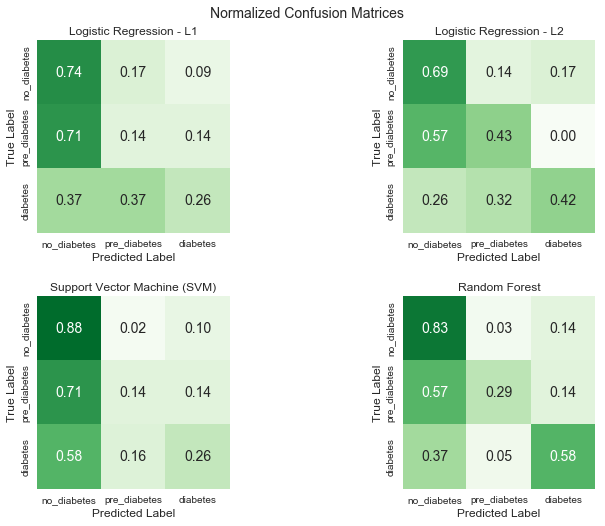

In [105]:
# Plot all confusion matrices for simple and plain models
plot_norm_conf_matrices(fitted_models_cs, models, 'Greens')

* All models were able to predict at least one point for the minority classes. Nice.

*  Random Forest did good on <code>no_diabetes</code> and <code>diabetes</code> classes, but Logistic Regression - L2 was the best with predicting <code>pre_diabetes</code>.

### Display confusion matrix and classification report for one or more models

Let's compare Random Forest and Logistic Regression - L2.

In [106]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_cs, models, 'rf')
class_rep_cm(fitted_models_cs, models, 'l2')


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,73,3,12
pre_diabetes,4,2,1
diabetes,7,1,11



              precision    recall  f1-score   support

 no_diabetes       0.87      0.83      0.85        88
pre_diabetes       0.33      0.29      0.31         7
    diabetes       0.46      0.58      0.51        19

   micro avg       0.75      0.75      0.75       114
   macro avg       0.55      0.56      0.56       114
weighted avg       0.77      0.75      0.76       114


	 Logistic Regression - L2


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,61,12,15
pre_diabetes,4,3,0
diabetes,5,6,8



              precision    recall  f1-score   support

 no_diabetes       0.87      0.69      0.77        88
pre_diabetes       0.14      0.43      0.21         7
    diabetes       0.35      0.42      0.38        19

   micro avg       0.63      0.63      0.63       114
   macro avg       0.45      0.51      0.46       114
weighted avg       0.74      0.63      0.67       114



* As we mentioned before, Logistic Regression - L2 did good on pre_diabetes, recall=0.43, but did relatively bad on the majority class.

* Random Forest did well on diabetes and pre_diabetes (recall=0.58) but slightly worse on pre_diabetes. It is the winner in this group.

### Display best_params_ for all fitted models

In [107]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_cs, models)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.05
Logistic Regression - L2,logisticregression__C,1
Logistic Regression - L2,logisticregression__solver,sag
Support Vector Machine (SVM),svc__C,0.1
Support Vector Machine (SVM),svc__gamma,0.1
Support Vector Machine (SVM),svc__kernel,poly
Random Forest,randomforestclassifier__criterion,entropy
Random Forest,randomforestclassifier__max_features,0.33
Random Forest,randomforestclassifier__min_samples_leaf,5


### D. SMOTE (Synthetic Minority Over-sampling Technique)

For this group we will utilize SMOTE to handle issues with the imbalanced data.

SMOTE is an over-sampling method that creates new (synthetic) samples based on the samples in our minority classes. It finds the k-nearest-neighbors of each member of the minority classes.

The new samples should be generated only in the training set to ensure our model generalizes well to unseen data.

We will be using [imblearn](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) python package.









#### Build Model Pipelines

* We are going to use the Pipeline from the imblearn package in place of scikit-learn Pipeline. 

* It takes care automatically to re-sample when called fit() on the pipeline, and does not re-sample test data (when called transform() or predict()).

Create a pipeline dictionary with pipelines for each algorithm.

In [108]:
# Pipeline dictionary for SMOTE
pipelines_sm = {
    'l1' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     LogisticRegression(penalty='l1',solver='saga', multi_class='multinomial',
                                        random_state=random_state)),
    'l2' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     LogisticRegression(penalty='l2', multi_class='multinomial',
                                        random_state=random_state)),
    'svm' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                      SVC(random_state=random_state)),
    'rf' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     RandomForestClassifier(random_state=random_state)),
    'gb' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     GradientBoostingClassifier(random_state=random_state)),
    'ab' : imbl_pipe(StandardScaler(), SMOTE(sampling_strategy='auto', random_state=random_state),
                     AdaBoostClassifier(random_state=random_state))
}

### Fit and Tune Models with Cross-Validation

In [109]:
# Fit and tune models with cross-validation
fitted_models_sm = fit_tune_CV(pipelines_sm, 'f1_macro')

l1 has been fitted
l2 has been fitted
svm has been fitted
rf has been fitted
gb has been fitted
ab has been fitted


### Display evaluation metrics

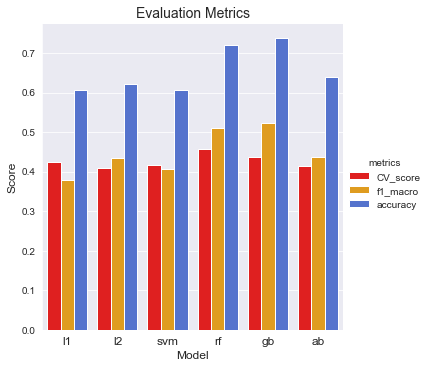

,CV_score,f1_macro,accuracy
model,,,
l1,0.423257,0.378132,0.605263
l2,0.408130,0.434748,0.622807
svm,0.417366,0.405540,0.605263
rf,0.458407,0.511111,0.719298
gb,0.437778,0.522429,0.736842
ab,0.415525,0.437384,0.640351


In [110]:
# Plot and display evaluation metrics for simple plain models
eval_df_sm = evaluation(fitted_models_sm)
eval_plot(eval_df_sm)
display(eval_df_sm)

* In this group Random Forest has the best cross-validation score.

* But, Gradient Boost performs the best on the test set, both accuracy and f1-macro score.

Let's now check confusion matrices and classification reports.

### Plot normalized confusion matrix heatmaps for all fitted models

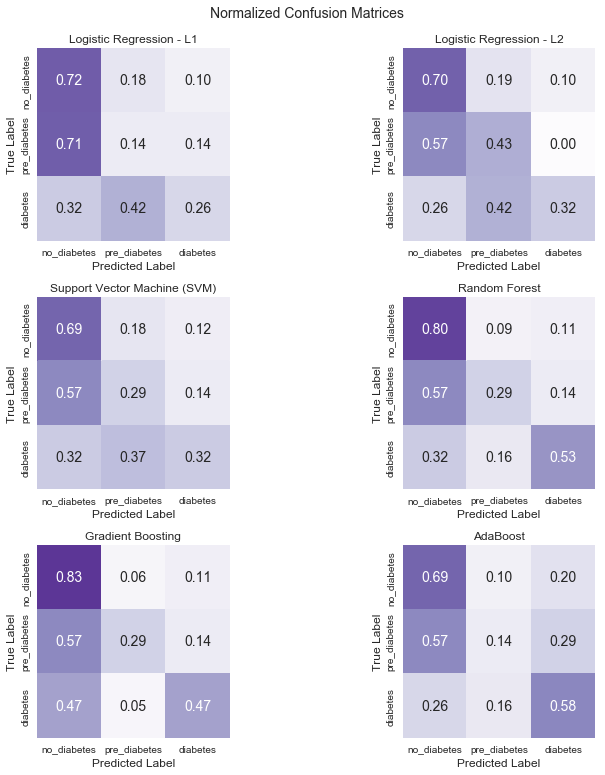

In [111]:
# Plot all confusion matrices for simple and plain models
plot_norm_conf_matrices(fitted_models_sm, models, 'Purples')

* From confusion matrices looks like that Random Forest outperforms Gradient Boost. It is even or better on minority classes but slightly worse on the majority class.

* From calssification reports below we can see that Random Forest is doing bad on precison for the <code>pre-diabetes</code> class. 0.15 compared with 0.25 precision of Gradient Boost. That makes f1-macro worst.

### Display confusion matrix and classification report for one or more models

In [112]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_sm, models, 'gb')
class_rep_cm(fitted_models_sm, models, 'rf')


	 Gradient Boosting


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,73,5,10
pre_diabetes,4,2,1
diabetes,9,1,9



              precision    recall  f1-score   support

 no_diabetes       0.85      0.83      0.84        88
pre_diabetes       0.25      0.29      0.27         7
    diabetes       0.45      0.47      0.46        19

   micro avg       0.74      0.74      0.74       114
   macro avg       0.52      0.53      0.52       114
weighted avg       0.75      0.74      0.74       114


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,70,8,10
pre_diabetes,4,2,1
diabetes,6,3,10



              precision    recall  f1-score   support

 no_diabetes       0.88      0.80      0.83        88
pre_diabetes       0.15      0.29      0.20         7
    diabetes       0.48      0.53      0.50        19

   micro avg       0.72      0.72      0.72       114
   macro avg       0.50      0.54      0.51       114
weighted avg       0.76      0.72      0.74       114



### Display best_params_ for all fitted models

In [113]:
# Display best_params_ for all fitted models
best_hyp_param(fitted_models_sm, models)

,Hyperparameter,Value
Model,,
Logistic Regression - L1,logisticregression__C,0.05
Logistic Regression - L2,logisticregression__C,0.1
Logistic Regression - L2,logisticregression__solver,newton-cg
Support Vector Machine (SVM),svc__C,0.5
Support Vector Machine (SVM),svc__gamma,5
Support Vector Machine (SVM),svc__kernel,linear
Random Forest,randomforestclassifier__criterion,gini
Random Forest,randomforestclassifier__max_features,0.33
Random Forest,randomforestclassifier__min_samples_leaf,15


### Winner

Let's collect our evalutaion results into one dataframe.

In [114]:
# Create dataframe with evaluations for all modules

# initialize dataframe
eval_df_all = pd.DataFrame()

# dictionary of evaluation dataframes
dgroups = {'pm' : eval_df_pm, 'f1':eval_df_f1, 'cs':eval_df_cs, 'sm':eval_df_sm}
# list of model groups abreviations 
mgroups = list(dgroups.keys())
# concatenate all dataframes
for i in mgroups:
    eval_df_t = dgroups[i].copy().reset_index()
    # change model names in the column 'model'
    eval_df_t['model'] = eval_df_t['model'] + '-{}'.format(i) 
    eval_df_all = pd.concat([eval_df_all, eval_df_t])

# sort new dataframe and display 10 best models
eval_df_all = eval_df_all.set_index('model')

In [115]:
len(eval_df_all)

22

We have trained 22 models in total.

Now, we are going to select winners.

**The best cross-validated score**

In [116]:
eval_df_all.sort_values('CV_score', ascending=False).head(1)

,CV_score,f1_macro,accuracy
model,,,
rf-pm,0.787072,0.410081,0.789474


The plain Random Forest model had the best cros-validated score. The default holdout score was accuracy. Practically, all models in the plain models group, were predicting the majority class only.

**The best accuracy score on the test set**

In [117]:
eval_df_all.sort_values('accuracy', ascending=False).head(1)

,CV_score,f1_macro,accuracy
model,,,
rf-f1,0.405695,0.473797,0.824561


The accuracy score is not the best option for multi-class classification tasks. The Random Forest model with f1-macro score, as the holdout score, was the best in this category.

And finally, we have a **winning** model

**The best f1_macro score on the test set - WINNER**

Let's list 10 best models evaluated with f1-macro score

In [118]:
eval_df_all.sort_values('f1_macro', ascending=False).head(10)

,CV_score,f1_macro,accuracy
model,,,
rf-cs,0.438159,0.556052,0.754386
gb-sm,0.437778,0.522429,0.736842
rf-sm,0.458407,0.511111,0.719298
gb-f1,0.427936,0.505279,0.763158
ab-f1,0.395413,0.505135,0.789474
rf-f1,0.405695,0.473797,0.824561
l2-cs,0.414028,0.455797,0.631579
ab-sm,0.415525,0.437384,0.640351
l2-sm,0.408130,0.434748,0.622807


* Out of 22 models, the winner (the best f1_macro score) is Random Forest with  cost-sensitive learning.

* The best 6 models are tree ensembles.

* As expected, Top 10 is ocupied by models for which we used one of the techniques for handling imbalanced classes.

Let's check the winner's confusion matrix and classification report for additional analysis.

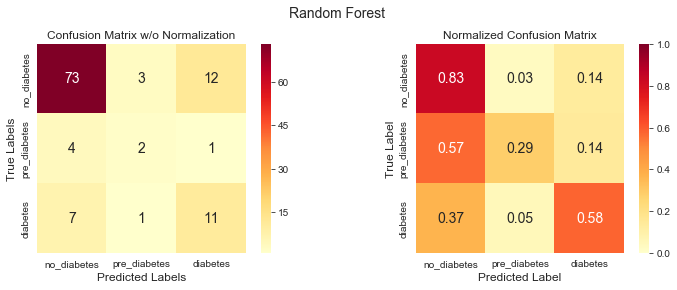

In [119]:
# Plot confusion matrix heatmaps without and with normalization
plot_conf_mat_w_and_wo_norm(fitted_models_cs, models, 'rf', 'YlOrRd')             

In [120]:
# Display classification report and confusion matrix
class_rep_cm(fitted_models_cs, models, 'rf')


	 Random Forest


Predicted Labels,no_diabetes,pre_diabetes,diabetes
True Labels,,,
no_diabetes,73,3,12
pre_diabetes,4,2,1
diabetes,7,1,11



              precision    recall  f1-score   support

 no_diabetes       0.87      0.83      0.85        88
pre_diabetes       0.33      0.29      0.31         7
    diabetes       0.46      0.58      0.51        19

   micro avg       0.75      0.75      0.75       114
   macro avg       0.55      0.56      0.56       114
weighted avg       0.77      0.75      0.76       114



As we discussed earlier, this model does OK on the majority class (recall=0.83) and not so bad on the </code>diabetes</code> class (recal=0.58). It would need some improvement on the least populated class, <code>pre_diabetes</code> (recall=0.29).

## Insights & Analysis

### Key Findings and Results

Our dataset was relatively small and imbalanced and we had to employ several techniques for handling imbalanced classes:

1. f1 macro averaged score for performance metric

2. cost-sensitive learning (penalize algorithms)

3. SMOTE - Synthetic Minority Over-sampling Technique

We have used six machine learning algorithms: $L_1$ and $L_2$ regularized Logistic Regressions, SVM and three tree ensembles, Random Forest, Gradient Boost and AdaBoost.

In total, we have trained 22 models.

* Plain models, without any of the above listed techniques, did pretty bad with predicting minority classes. They mostly predicted the majority class. Because of that, their accuracy score was high, but f1-macro score was low. As expected, tree ensembles models, were performed slightly better.

* All three techniques listed above, made a positive difference. Again, tree ensemble models produced better performance.

* We could not find one single health condition that could alone increase the risk of being diagnosed with type 2 diabetes.

* It looks that they are working differently for different people.

* From our limited sample, we could conclude that the most contributing factors were age, cholesterol ratio and waist circumference.


**Winning model**

The Random Forest model with cost-sensitive learning have produced the best performance:

* prety good on the majority class - recall=0.83

* on the diabetes class not so bad - recall=0.58

* not so good on the smallest, pre-diabetes, class - recall=0.29

**It is interesting to note the following regarding predicting pre-diabetes:**

* there were only 7 labels in the test set

* recall=0.29 means 2 successfully predicted labels and in addition to our winning model, only 3 models had this score: Gradient Boost, Random Forest and SVM all with SMOTE  

* only 2 models succeded in 3 positive prediction, recall=0.43. Surprisingly, that was $L_2$-regularized Logistic Regression with SMOTE and cost-sensitive learning.


### Possible Improvements and Expansions

These are some of possible improvements/expansions for this project:

* Acquire a bigger dataset so that the smallest class will have more than 7 points in the test set. And maybe, a bigger sample could produce different relationships among the features.

* Additional hyperparameters tuning on few best performing models

* Perform additional feature selection and dimensionality reduction (PCA)

## References

* [Using Smote with Gridsearchcv in Scikit-learn](https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn)

* [Model evaluation: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)

* [Exploring class imbalance, resampling and weights](https://www.kaggle.com/eikedehling/exploring-class-imbalance-resampling-and-weights)

* [Multiclass classification using scikit-learn](https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/)

* [Evaluating a Classification Model](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)

* [How to Handle Imbalanced Classes in Machine Learning](https://elitedatascience.com/imbalanced-classes)

* [Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

* [A Deep Dive Into Imbalanced Data: Over-Sampling](https://towardsdatascience.com/a-deep-dive-into-imbalanced-data-over-sampling-f1167ed74b5)

* [Hemoglobin A1c (HbA1c) Test for Diabetes](https://www.webmd.com/diabetes/guide/glycated-hemoglobin-test-hba1c?print=true)

* [Type 2 diabetes](https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199)

* [Rethinking A1c goals for type 2 diabetes](https://www.health.harvard.edu/blog/rethinking-a1c-goals-for-type-2-diabetes-2018032613452)

* [About Adult BMI](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#Interpreted)

* [Why is the hip-waist ratio important?](https://www.medicalnewstoday.com/articles/319439.php)

* [What Is Cholesterol Ratio?](https://universityhealthnews.com/daily/heart-health/cholesterol-ratio-more-important-than-total-cholesterol-or-ldl-cholesterol/)

* [Hypertension Chart - Understanding Your Blood Pressure](https://www.healthline.com/health/blood-pressure-chart)

* [Waist Size Predicts Diabetes Risk](https://www.webmd.com/diabetes/news/20050310/waist-size-predicts-diabetes-risk?print=true)
